# **S&P500 Index and Stock Market Analysis**

# Description:

The S&P 500 index is a market index containing the 500 largest publicly traded US companies (from both NASDAQ and NYSE stock exchanges), selected by market capitalization and representing approximately 80% of the total US stock market value.
The S&P 500 is a stock market index that tracks the largest 500 publicly traded U.S. companies.
Investors have long used the S&P 500 as a benchmark for their investments as it tends to signal overall market health. 
The index is a popular choice for long-term investors who wish to watch growth over the coming decades.

# Observations:
Track the performance of the US stock market.
Benchmark their own portfolio's performance.
Make investment decisions.
The index is capitalization-weighted, meaning that companies with larger market capitalizations have a greater influence on the index's value.

# Objective of this notebook


The objective of this notebook is to analyze the S&P500. We’ll visualize differences between companies and explore their relationships.

# 1.**Import Libraries and Modules**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# **2.Loading Dataset & Inspecting Data**

# 2.1.Loading the Dataset

# 2.1.1.S&P_500.Companies

In [30]:
comp_data = pd.read_csv(r"D:\Data Science\SP_500_Companies.csv")

In [7]:
comp_data

Exchange Symbol                       Shortname  \
0        NMS   NVDA              NVIDIA Corporation   
1        NMS   AAPL                      Apple Inc.   
2        NMS   MSFT           Microsoft Corporation   
3        NMS   AMZN                Amazon.com, Inc.   
4        NMS  GOOGL                   Alphabet Inc.   
..       ...    ...                             ...   
497      NMS    WBA  Walgreens Boots Alliance, Inc.   
498      NYQ    BWA                 BorgWarner Inc.   
499      NYQ    FMC                 FMC Corporation   
500      NMS   QRVO                     Qorvo, Inc.   
501      NYQ   AMTM          Amentum Holdings, Inc.   

                           Longname                  Sector  \
0                NVIDIA Corporation              Technology   
1                        Apple Inc.              Technology   
2             Microsoft Corporation              Technology   
3                  Amazon.com, Inc.       Consumer Cyclical   
4                     Alphabet Inc.  Communication Services   
..                              ...                     ...   
497  Walgreens Boots Alliance, Inc.              Healthcare   
498                 BorgWarner Inc.       Consumer Cyclical   
499                 FMC Corporation         Basic Materials   
500                     Qorvo, Inc.              Technology   
501          Amentum Holdings, Inc.             Industrials   

                           Industry  Currentprice     Marketcap        Ebitda  \
0                    Semiconductors        141.95  3.480000e+12  6.118400e+10   
1              Consumer Electronics        229.87  3.470000e+12  1.350000e+11   
2         Software - Infrastructure        417.00  3.100000e+12  1.370000e+11   
3                   Internet Retail        197.12  2.070000e+12  1.120000e+11   
4    Internet Content & Information        164.76  2.030000e+12  1.230000e+11   
..                              ...           ...           ...           ...   
497        Pharmaceutical Retailers          8.66  7.487583e+09  2.884000e+09   
498                      Auto Parts         34.12  7.462044e+09  1.882000e+09   
499             Agricultural Inputs         58.74  7.332867e+09  7.033000e+08   
500                  Semiconductors         69.25  6.545974e+09  6.731300e+08   
501     Specialty Business Services         24.43  5.943868e+09  4.330000e+08   

     Revenuegrowth           City State        Country  Fulltimeemployees  \
0            1.224    Santa Clara    CA  United States            29600.0   
1            0.061      Cupertino    CA  United States           164000.0   
2            0.160        Redmond    WA  United States           228000.0   
3            0.110        Seattle    WA  United States          1551000.0   
4            0.151  Mountain View    CA  United States           181269.0   
..             ...            ...   ...            ...                ...   
497          0.060      Deerfield    IL  United States           193000.0   
498         -0.048   Auburn Hills    MI  United States            39900.0   
499          0.085   Philadelphia    PA  United States             5800.0   
500         -0.052     Greensboro    NC  United States             8700.0   
501         -0.031      Chantilly    VA  United States                NaN   

                                   Longbusinesssummary    Weight  
0    NVIDIA Corporation provides graphics and compu...  0.062610  
1    Apple Inc. designs, manufactures, and markets ...  0.062579  
2    Microsoft Corporation develops and supports so...  0.055838  
3    Amazon.com, Inc. engages in the retail sale of...  0.037330  
4    Alphabet Inc. offers various products and plat...  0.036504  
..                                                 ...       ...  
497  Walgreens Boots Alliance, Inc. operates as a h...  0.000135  
498  BorgWarner Inc., together with its subsidiarie...  0.000134  
499  FMC Corporation, an agricultural sciences comp...  0.000132  
500  Qorvo, Inc. e

In [9]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    float64
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight               502 non-null    flo

* Exchange: The stock exchange where the company is listed.
* Symbol: The ticker symbol of the company’s stock.
* Shortname: The abbreviated name or shorthand version of the company's name.
* Longname: The full, official name of the company.
* Sector: The broad category or industry group the company belongs to (e.g., technology, healthcare).
* Industry: The specific industry the company operates within (e.g., software, pharmaceuticals).
* Currentprice: The current trading price of the company’s stock.
* Marketcap: The total market value of the company's outstanding shares.
* Ebitda: Earnings Before Interest, Taxes, Depreciation, and Amortization of the company.
* Revenuegrowth: The rate at which the company's revenue has grown.
* City: The city where the company is located.
* State: The state (or region) where the company is located.
* Country: The country where the company is based.
* Fulltimeemployees: The number of full-time employees working for the company.
* Longbusinesssummary: A detailed description of the company's business activities.

In [36]:
comp_data.shape

(502, 16)

### Observations:
The shape of this dataframe is (502, 16) 

In [41]:
comp_data.describe()

Currentprice     Marketcap        Ebitda  Revenuegrowth  \
count    502.000000  5.020000e+02  4.730000e+02     499.000000   
mean     227.430408  1.106102e+11  7.046619e+09       0.070427   
std      515.947350  3.226317e+11  1.625531e+10       0.180247   
min        8.660000  5.943868e+09 -3.991000e+09      -0.602000   
25%       70.067500  2.034935e+10  1.625000e+09       0.002000   
50%      129.090000  3.770734e+10  2.952748e+09       0.049000   
75%      239.667500  8.527435e+10  6.020000e+09       0.109000   
max     9007.240000  3.480000e+12  1.500000e+11       1.632000   

       Fulltimeemployees      Weight  
count       4.930000e+02  502.000000  
mean        5.786189e+04    0.001992  
std         1.395867e+05    0.005811  
min         2.800000e+01    0.000107  
25%         1.020000e+04    0.000366  
50%         2.169000e+04    0.000679  
75%         5.510000e+04    0.001536  
max         2.100000e+06    0.062610

# 2.1.2.S&P_500_Stocks

In [50]:
stocks_data = pd.read_csv(r"D:\Data Science\sp500_stocks.csv")

In [52]:
stocks_data

Date Symbol   Adj Close       Close        High         Low  \
0        2010-01-04    MMM   43.783882   69.414719   69.774246   69.122070   
1        2010-01-05    MMM   43.509617   68.979935   69.590302   68.311035   
2        2010-01-06    MMM   44.126663   69.958191   70.735786   69.824417   
3        2010-01-07    MMM   44.158321   70.008362   70.033447   68.662209   
4        2010-01-08    MMM   44.469463   70.501671   70.501671   69.648827   
...             ...    ...         ...         ...         ...         ...   
1881993  2024-11-18    ZTS  176.419998  176.419998  177.199997  173.660004   
1881994  2024-11-19    ZTS  175.559998  175.559998  176.500000  173.240005   
1881995  2024-11-20    ZTS  175.669998  175.669998  177.410004  173.830002   
1881996  2024-11-21    ZTS  176.710007  176.710007  177.660004  174.550003   
1881997  2024-11-22    ZTS  176.960007  176.960007  178.070007  176.279999   

               Open     Volume  
0         69.473244  3640265.0  
1         69.230766  3405012.0  
2         70.133781  6301126.0  
3         69.665550  5346240.0  
4         69.974915  4073337.0  
...             ...        ...  
1881993  174.130005  3172900.0  
1881994  174.880005  2208300.0  
1881995  176.419998  2187300.0  
1881996  175.699997  2019500.0  
1881997  176.350006  1854600.0  

[1881998 rows x 8 columns]

In [54]:
stocks_data.head()

Date Symbol  Adj Close      Close       High        Low       Open  \
0  2010-01-04    MMM  43.783882  69.414719  69.774246  69.122070  69.473244   
1  2010-01-05    MMM  43.509617  68.979935  69.590302  68.311035  69.230766   
2  2010-01-06    MMM  44.126663  69.958191  70.735786  69.824417  70.133781   
3  2010-01-07    MMM  44.158321  70.008362  70.033447  68.662209  69.665550   
4  2010-01-08    MMM  44.469463  70.501671  70.501671  69.648827  69.974915   

      Volume  
0  3640265.0  
1  3405012.0  
2  6301126.0  
3  5346240.0  
4  4073337.0

In [58]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881998 entries, 0 to 1881997
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 114.9+ MB


* Date: The date of the stock data entry.
* Symbol: The ticker symbol of the company’s stock.
* Adj Close: The adjusted closing price of the stock, accounting for splits and dividends.
* Close: The final trading price of the stock for that day.
* High: The highest price the stock reached during the trading day.
* Low: The lowest price the stock reached during the trading day.
* Open: The price of the stock at the start of the trading day.
* Volume: The total number of shares traded during the day.

In [60]:
stocks_data.shape

(1881998, 8)

### Observations:
The shape of this dataframe is (1881998, 8) 

In [62]:
stocks_data.describe()

Adj Close         Close          High           Low          Open  \
count  1.776623e+06  1.776623e+06  1.776623e+06  1.776623e+06  1.776623e+06   
mean   9.718452e+01  1.049508e+02  1.060899e+02  1.037556e+02  1.049318e+02   
std    2.152873e+02  2.156298e+02  2.180926e+02  2.130830e+02  2.155443e+02   
min    2.036069e-01  2.220000e-01  2.262500e-01  2.162500e-01  2.180000e-01   
25%    2.887000e+01  3.498000e+01  3.536986e+01  3.458000e+01  3.498000e+01   
50%    5.388303e+01  6.292000e+01  6.355000e+01  6.224670e+01  6.290000e+01   
75%    1.034550e+02  1.137471e+02  1.149200e+02  1.125300e+02  1.137400e+02   
max    9.924400e+03  9.924400e+03  9.964770e+03  9.794000e+03  9.914170e+03   

             Volume  
count  1.776623e+06  
mean   7.010787e+06  
std    3.310849e+07  
min    0.000000e+00  
25%    1.011800e+06  
50%    2.197800e+06  
75%    5.026000e+06  
max    3.692928e+09

# 2.1.3. S&P_500_Index

In [69]:
index_data = pd.read_csv(r"D:\Data Science\sp500_index.csv")

In [71]:
index_data

Date   S&P500
0     2014-11-24  2069.41
1     2014-11-25  2067.03
2     2014-11-26  2072.83
3     2014-11-28  2067.56
4     2014-12-01  2053.44
...          ...      ...
2512  2024-11-18  5893.62
2513  2024-11-19  5916.98
2514  2024-11-20  5917.11
2515  2024-11-21  5948.71
2516  2024-11-22  5969.34

[2517 rows x 2 columns]

In [73]:
index_data.head()

Date   S&P500
0  2014-11-24  2069.41
1  2014-11-25  2067.03
2  2014-11-26  2072.83
3  2014-11-28  2067.56
4  2014-12-01  2053.44

In [75]:
index_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


In [83]:
index_data.shape

(2517, 2)

### Observations:
The shape of this dataframe is (2517, 2) 

# 2.2.Handle Missing Values

In [86]:
comp_data.isna().sum()

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           3
City                    0
State                  20
Country                 0
Fulltimeemployees       9
Longbusinesssummary     0
Weight                  0
dtype: int64

In [34]:

import warnings
from pandas.errors import SettingWithCopyWarning

# Suppress the SettingWithCopyWarning
warnings.simplefilter("ignore", category=SettingWithCopyWarning)

# Your data processing
comp_data = comp_data.dropna(subset=['State'])
comp_data['Ebitda'] = comp_data['Ebitda'].fillna(comp_data['Ebitda'].median())
comp_data['Revenuegrowth'] = comp_data['Revenuegrowth'].fillna(comp_data['Revenuegrowth'].median())
comp_data['Fulltimeemployees'] = comp_data['Fulltimeemployees'].fillna(comp_data['Fulltimeemployees'].median())


## Observations:
The code fills missing values (NaN) in specific columns of the DataFrame ('Ebitda', 'Revenuegrowth', and 'Fulltimeemployees') with the median of each respective column. This approach ensures that the central tendency of the data is preserved while addressing missing values.

In [36]:
comp_data.isna().sum()

Exchange               0
Symbol                 0
Shortname              0
Longname               0
Sector                 0
Industry               0
Currentprice           0
Marketcap              0
Ebitda                 0
Revenuegrowth          0
City                   0
State                  0
Country                0
Fulltimeemployees      0
Longbusinesssummary    0
Weight                 0
dtype: int64

In [92]:
stocks_data.isna().sum()

Date              0
Symbol            0
Adj Close    105375
Close        105375
High         105375
Low          105375
Open         105375
Volume       105375
dtype: int64

In [124]:
stocks_data['Volume'] = stocks_data['Volume'].fillna(0)
stocks_data['Close'] = stocks_data['Close'].fillna(stocks_data['Close'].mean())
stocks_data['Open'] = stocks_data['Open'].fillna(stocks_data['Open'].mean())
stocks_data['High'] = stocks_data['High'].fillna(stocks_data['High'].mean())
stocks_data['Low'] = stocks_data['Low'].fillna(stocks_data['Low'].mean())
stocks_data['Adj Close'] = stocks_data['Adj Close'].fillna(stocks_data['Adj Close'].mean())

## Observations:
* The Volume column is filled with 0 for missing values. This is useful when 0 can be a valid replacement for missing trading volume, indicating no trading activity for that particular data point.
* Missing values in the stock price columns ('Close', 'Open', 'High', 'Low', and 'Adj Close') are filled with the mean of each respective column. This is a standard method to handle missing numerical data when you want to retain the overall distribution and minimize the impact of extreme values

In [96]:
stocks_data.isna().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [98]:
index_data.isna().sum()

Date      0
S&P500    0
dtype: int64

## Insights:
All null values have been addressed, and the dataset is now complete without any missing data.

In [100]:
comp_data.columns.tolist()

['Exchange',
 'Symbol',
 'Shortname',
 'Longname',
 'Sector',
 'Industry',
 'Currentprice',
 'Marketcap',
 'Ebitda',
 'Revenuegrowth',
 'City',
 'State',
 'Country',
 'Fulltimeemployees',
 'Longbusinesssummary',
 'Weight']

In [102]:
stocks_data.columns.tolist()

['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [104]:
index_data.columns.tolist()

['Date', 'S&P500']

# 2.3.Value Counts for each category

In [107]:
comp_category = comp_data.select_dtypes('object')
for col in comp_category.columns:
  print(comp_data[[col]].value_counts())
  print('')

Exchange
NYQ         334
NMS         146
BTS           1
NGM           1
Name: count, dtype: int64

Symbol
A         1
PLTR      1
NTAP      1
NSC       1
NRG       1
         ..
EPAM      1
EOG       1
ENPH      1
EMR       1
ZTS       1
Name: count, Length: 482, dtype: int64

Shortname                      
Fox Corporation                    2
Alphabet Inc.                      2
News Corporation                   2
3M Company                         1
Newmont Corporation                1
                                  ..
Elevance Health, Inc.              1
Electronic Arts Inc.               1
Edwards Lifesciences Corporatio    1
Edison International               1
lululemon athletica inc.           1
Name: count, Length: 479, dtype: int64

Longname            
Fox Corporation         2
News Corporation        2
Alphabet Inc.           2
3M Company              1
ONEOK, Inc.             1
                       ..
Equinix, Inc.           1
Equifax Inc.            1
Entergy Corpo

In [109]:
stock_category = stocks_data.select_dtypes('object')
for col in stock_category.columns:
  print(stocks_data[[col]].value_counts())
  print('')

Date      
2010-01-04    502
2019-12-13    502
2019-11-26    502
2019-11-27    502
2019-11-29    502
             ... 
2014-12-26    502
2014-12-29    502
2014-12-30    502
2014-12-31    502
2024-11-22    502
Name: count, Length: 3749, dtype: int64

Symbol
A         3749
NCLH      3749
NTRS      3749
NTAP      3749
NSC       3749
          ... 
ENPH      3749
EMR       3749
EMN       3749
ELV       3749
ZTS       3749
Name: count, Length: 502, dtype: int64



In [111]:
index_category = index_data.select_dtypes('object')
for col in index_category.columns:
  print(index_data[[col]].value_counts())
  print('')

Date      
2014-11-24    1
2021-08-02    1
2021-07-22    1
2021-07-23    1
2021-07-26    1
             ..
2018-03-27    1
2018-03-28    1
2018-03-29    1
2018-04-02    1
2024-11-22    1
Name: count, Length: 2517, dtype: int64



In [113]:
# Convert the 'Date' column to datetime format
index_data['Date'] = pd.to_datetime(index_data['Date'])

# Verify the conversion
print(index_data.dtypes)

Date      datetime64[ns]
S&P500           float64
dtype: object


# 3.Exploratory Data Analysis

# 3.1 Analyzing Companies by Weight

In [117]:
data1=comp_data.sort_values('Weight',ascending=False)
print(len(comp_data))

482


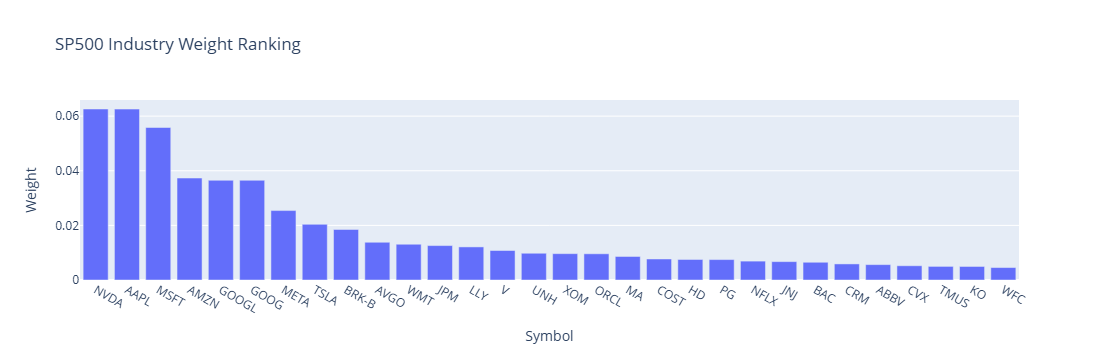

In [119]:
fig = px.bar(data1[:30], x='Symbol', y='Weight',title="SP500 Industry Weight Ranking")
fig.show()

## Insights:
* The chart shows the relative weights of different S&P 500 companies, with each bar representing a company (symbol) and its associated weight in the index.
* The top 30 companies are ranked by their weight, indicating their significance in the index and their impact on the overall performance of the S&P 500.
* Here,NVDA & AAPL has more weightage than others.

# 3.2.Sector Wise Distributions

# 3.2.1.Pie Chart for Sector Distributions

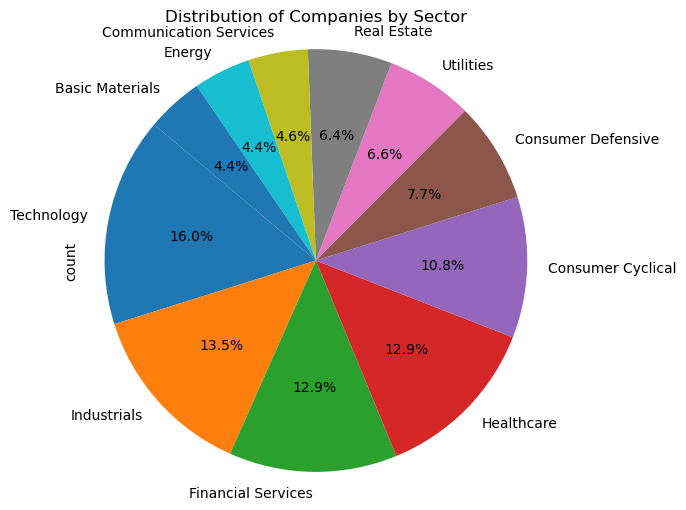

In [128]:
plt.figure(figsize=(6, 6))
comp_data['Sector'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Companies by Sector')
plt.axis('equal')
plt.show()

## Insights:
* The chart illustrates the percentage distribution of companies across various sectors, emphasizing the sectors with the highest representation in the dataset.
* It offers insights into the relative size of each sector, allowing for the identification of the most prominent sectors compared to others.
* The Technology sector leads with 16.0%, followed by Industrials at 13.5%, while both Financials and Healthcare sectors contribute equally at 12.9%.

# 3.2.2. Breakdown of Sectors in S&P 500

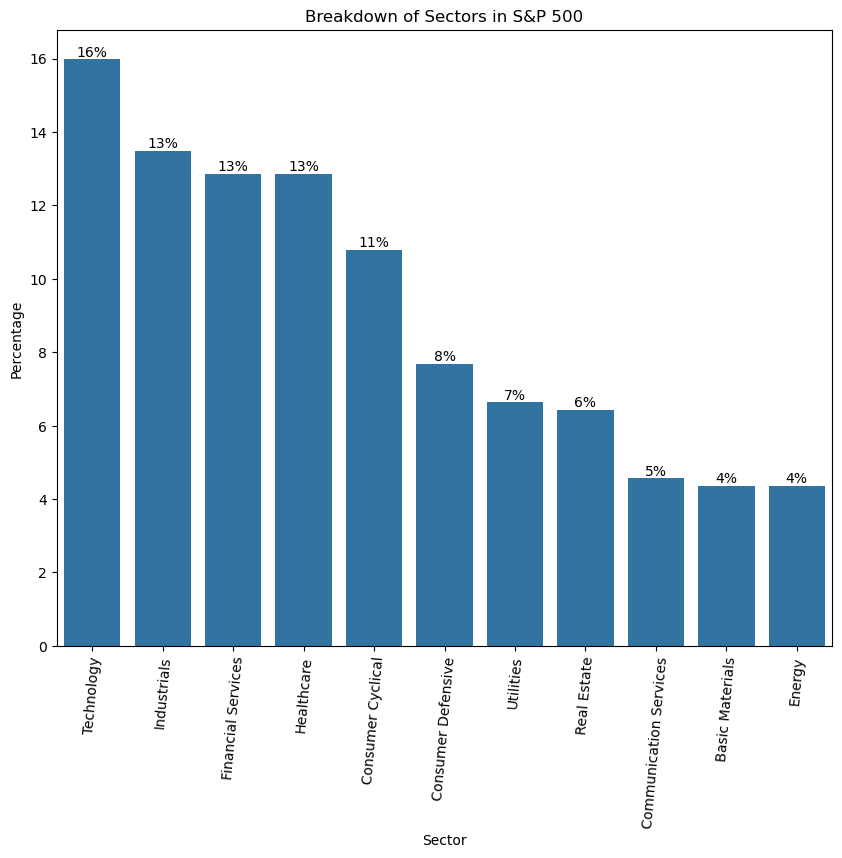

In [131]:
plt.subplots(figsize=(10,8))
sp_sec_brk=comp_data.groupby(by='Sector')['Symbol'].apply(lambda x:round(x.count()/len(comp_data)*100,2)).reset_index().sort_values(by='Symbol',ascending=False)
ax=sns.barplot(data=sp_sec_brk, x='Sector', y='Symbol')
ax.bar_label(ax.containers[0],fmt='%.0f%%')
plt.xticks(rotation=85)
plt.title("Breakdown of Sectors in S&P 500")
ax.set_ylabel("Percentage")
plt.show()

## Insights:
* Each bar represents a sector in the S&P 500, with the height indicating the percentage of companies in that sector relative to the total number of companies.
* The percentage labels on each bar show the exact proportion of companies in each sector, providing a detailed breakdown.

# 3.2.3. Annual Return By Sector

In [68]:

years_list = [2020, 2021, 2022, 2023, 2024]
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
stocks_data['Year'] = stocks_data['Date'].dt.year

df_filtered = stocks_data[stocks_data['Year'].isin(years_list)]
def get_year_open_close(df):
    year_open = df.loc[df['Date'].idxmin(), 'Open']  # Get the first day's open
    year_close = df.loc[df['Date'].idxmax(), 'Close']  # Get the last day's close
    return pd.Series({'year_open': year_open, 'year_close': year_close})

In [70]:
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter("ignore", category=SettingWithCopyWarning)

df_yearly_values = df_filtered.sort_values('Date').groupby(['Symbol', 'Year']).apply(get_year_open_close).reset_index()
df_yearly_values = df_yearly_values[['Symbol', 'Year', 'year_open', 'year_close']]
comp_data_expanded = comp_data.loc[comp_data.index.repeat(len(years_list))].reset_index(drop=True)
comp_data_expanded['Year'] = [year for year in years_list for _ in range(len(comp_data))]
df_combined = pd.merge(comp_data_expanded, df_yearly_values, on=['Symbol', 'Year'], how='left')

df_combined['annual_return'] = (df_combined['year_close'] - df_combined['year_open']) / df_combined['year_open']

C:\Users\User\AppData\Local\Temp\ipykernel_19140\2587734062.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_yearly_values = df_filtered.sort_values('Date').groupby(['Symbol', 'Year']).apply(get_year_open_close).reset_index()


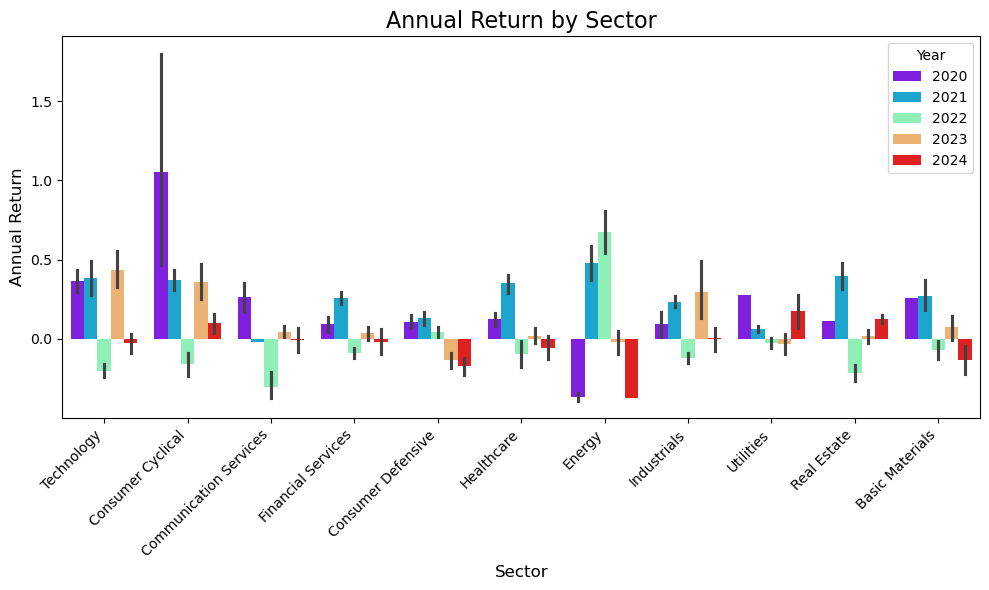

In [138]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_combined, x='Sector', y='annual_return', hue='Year', palette="rainbow")
plt.title('Annual Return by Sector', fontsize=16)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Annual Return', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Insights:
* The bar plot visualizes the annual return for each sector across different years, with colors representing different years. This allows for a clear comparison of sector performance over time.
* The chart shows that in 2022, most sectors experienced a significant downturn(Ongoing supply chain disruptions, exacerbated by the COVID-19 pandemic and geopolitical tensions  negatively affected several sectors) while in 2024, sectors like Energy and Basic Materials saw declines, indicating a change in market dynamics. 
* Healthcare also showed a slight decrease in performance compared to previous years.

# 3.2.4. Sector with Features

In [75]:
f = {'Revenuegrowth':['mean'], 'Marketcap':['sum'], 'Longname':['count']}

sector_breakdown = comp_data.groupby('Sector').agg(f)
sector_breakdown.columns = sector_breakdown.columns.get_level_values(0)
sector_breakdown = sector_breakdown.reset_index()
sector_breakdown = sector_breakdown.sort_values('Longname', ascending=False)

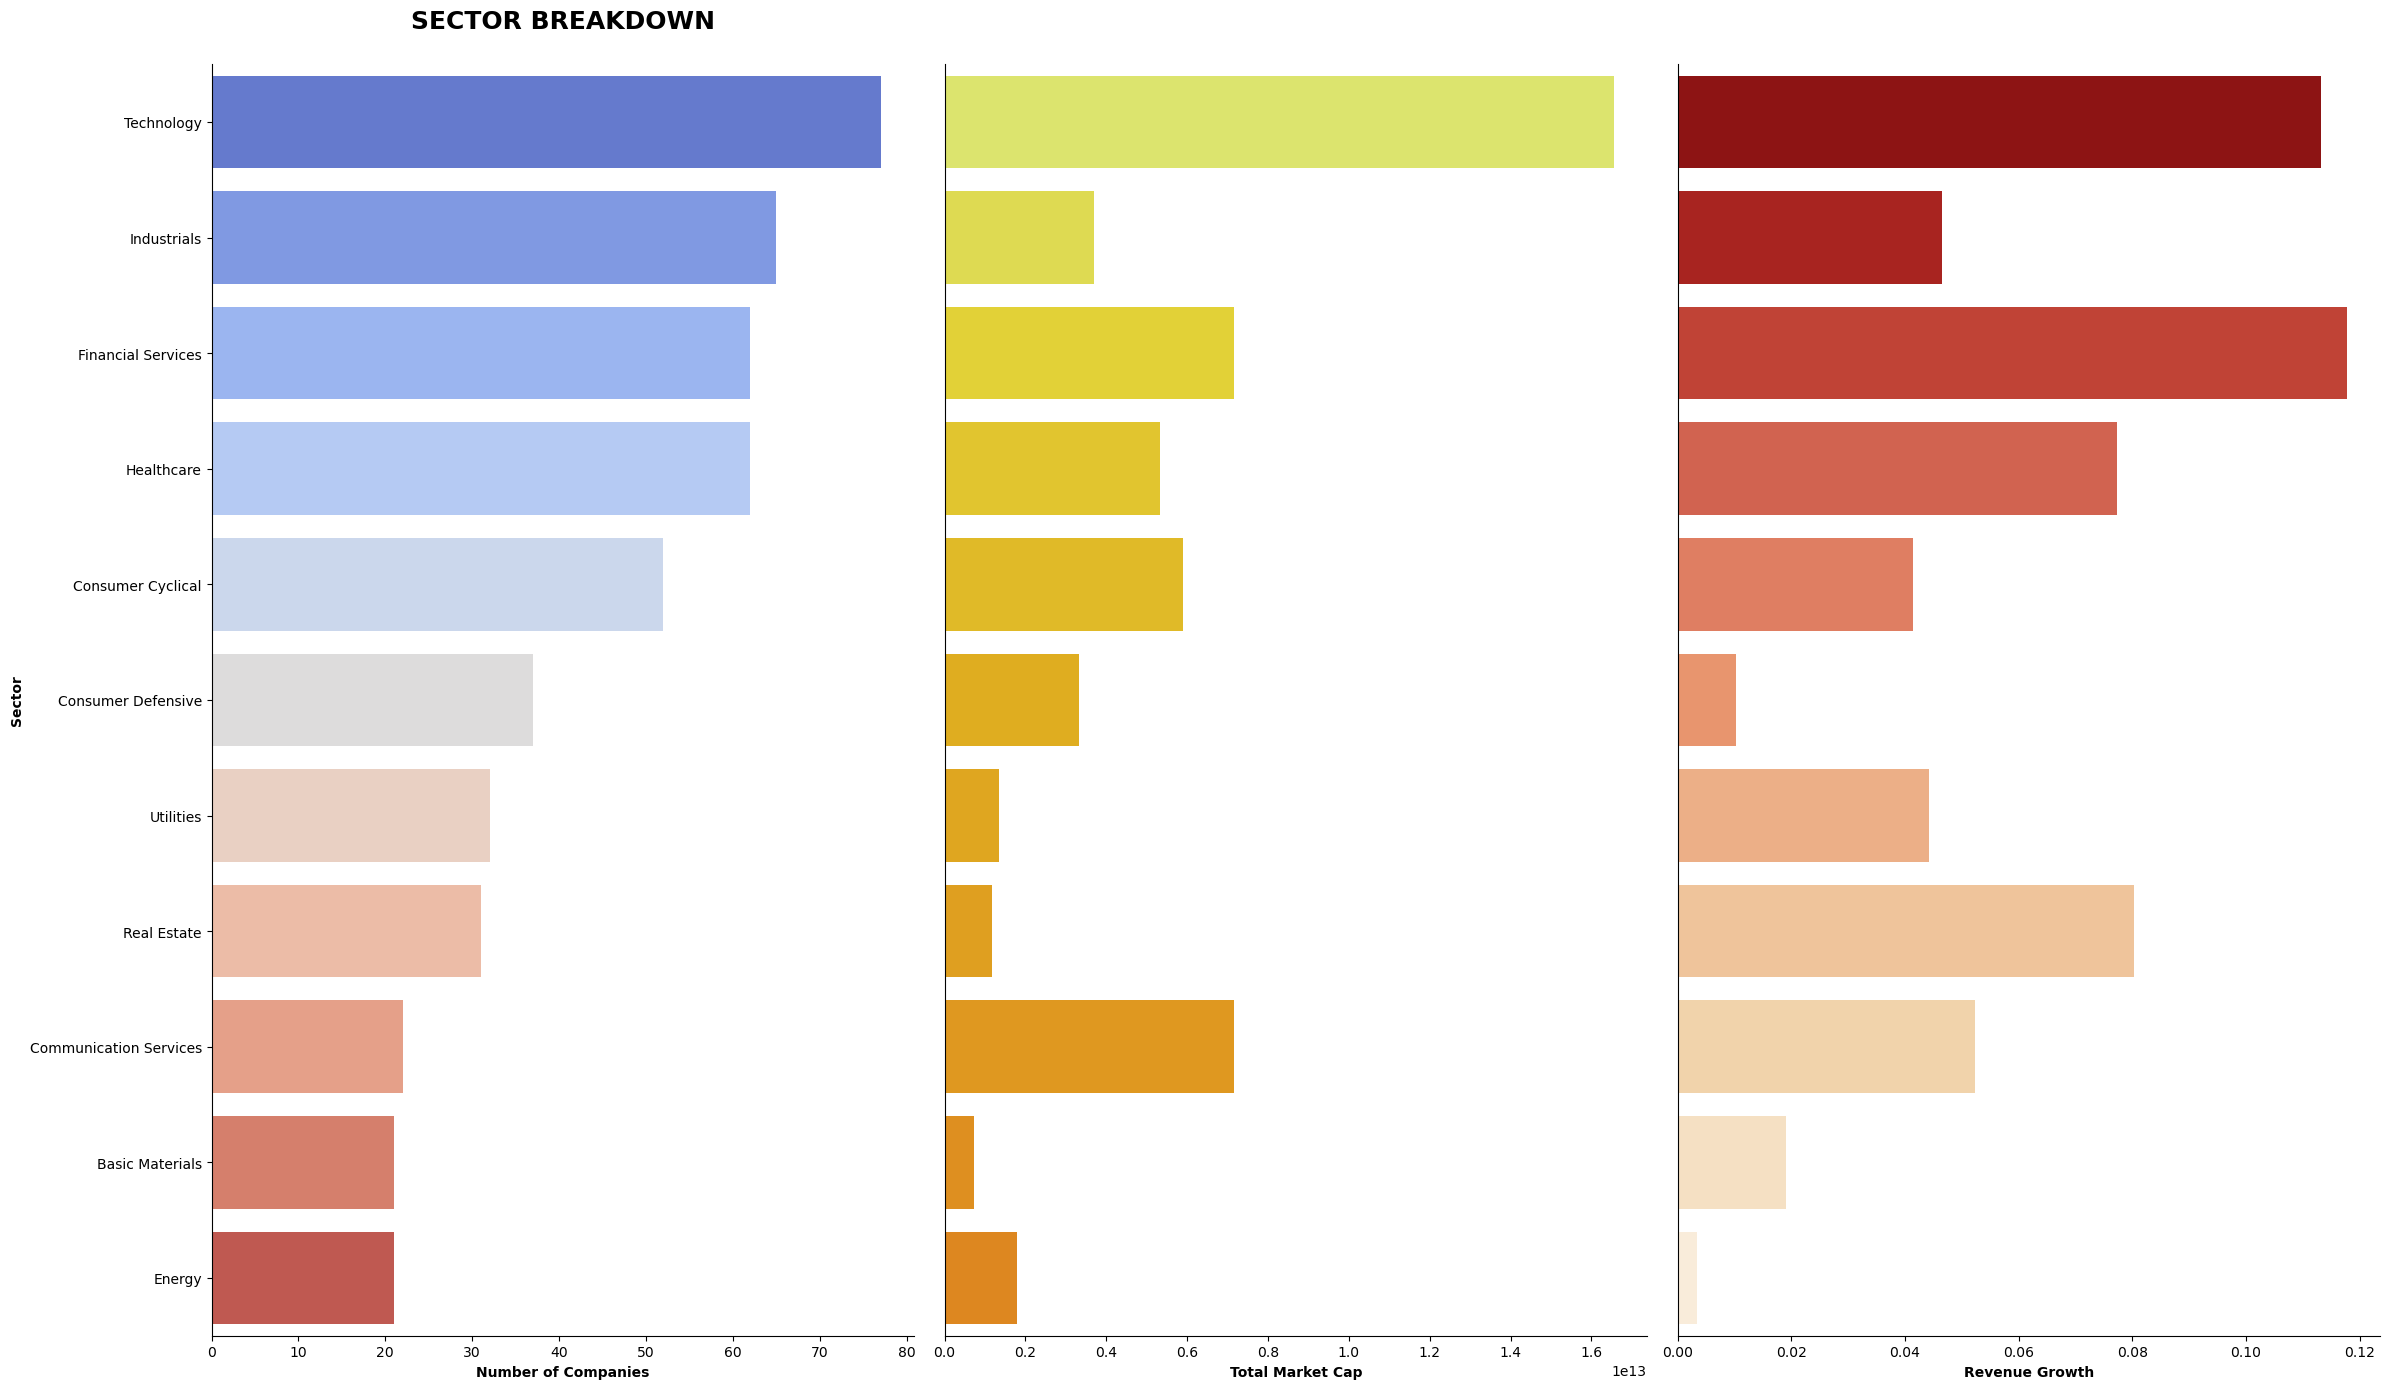

In [79]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Future and Deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


fig = plt.figure(num=None, figsize=(24, 14), dpi=100, facecolor='w', edgecolor='k')

# First subplot (Sector Breakdown)
plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="Longname", y="Sector", data=sector_breakdown, palette='coolwarm')
ax1.set_xlabel('Number of Companies', weight='bold')
ax1.set_ylabel('Sector', weight='bold')
ax1.set_title('SECTOR BREAKDOWN\n', weight='bold', fontsize=18)

# Second subplot (Total Market Cap)
plt.subplot(1, 3, 2)
ax2 = sns.barplot(x="Marketcap", y="Sector", data=sector_breakdown, palette='Wistia')
ax2.set_xlabel('Total Market Cap', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])  # Remove y-axis ticks

# Third subplot (Revenue Growth)
plt.subplot(1, 3, 3)
ax3 = sns.barplot(x="Revenuegrowth", y="Sector", data=sector_breakdown, palette='OrRd_r')
ax3.set_xlabel('Revenue Growth', weight='bold')
ax3.set_ylabel('')
ax3.set_yticks([])  

sns.despine()

plt.tight_layout()


plt.show()


## Insights:
* The first plot (Sector Breakdown) visually represents the distribution of companies across different sectors. It helps in understanding which sectors dominate the market in terms of the number of companies present, indicating sectoral concentration in the dataset.
Market Capitalization Representation:

* The second plot (Total Market Cap) shows the total market capitalization for each sector. This allows us to see which sectors have the largest financial impact, with potentially fewer companies in some sectors but higher market values, suggesting a concentration of wealth in certain sectors like technology or healthcare.
Revenue Growth Trends:

* The third plot (Revenue Growth) illustrates the revenue growth for each sector. This plot highlights the sectors with the most significant revenue growth and can help identify sectors that may be outperforming or underperforming in terms of financial growth. For example, sectors like technology or healthcare may show high growth compared to more mature sectors like utilities or energy.

# 3.3.Market Capitalization

# 3.3.1.Marketcap Distributions

In [148]:
industry_groups = comp_data.groupby(['Industry', 'Sector'])

In [150]:
aggregate_stats = industry_groups.agg({
    'Marketcap': 'mean',  
    'Ebitda': 'median',   
    'Revenuegrowth': 'mean'  
})

In [152]:
aggregate_stats.reset_index(inplace=True)

In [154]:
top_industries = aggregate_stats.nlargest(10, 'Marketcap')['Industry']

In [156]:
top_industries_data = comp_data[comp_data['Industry'].isin(top_industries)]

In [157]:
industry_marketcap = top_industries_data.groupby('Industry')['Marketcap'].mean().reset_index()
industry_marketcap = industry_marketcap.sort_values('Marketcap', ascending=False)

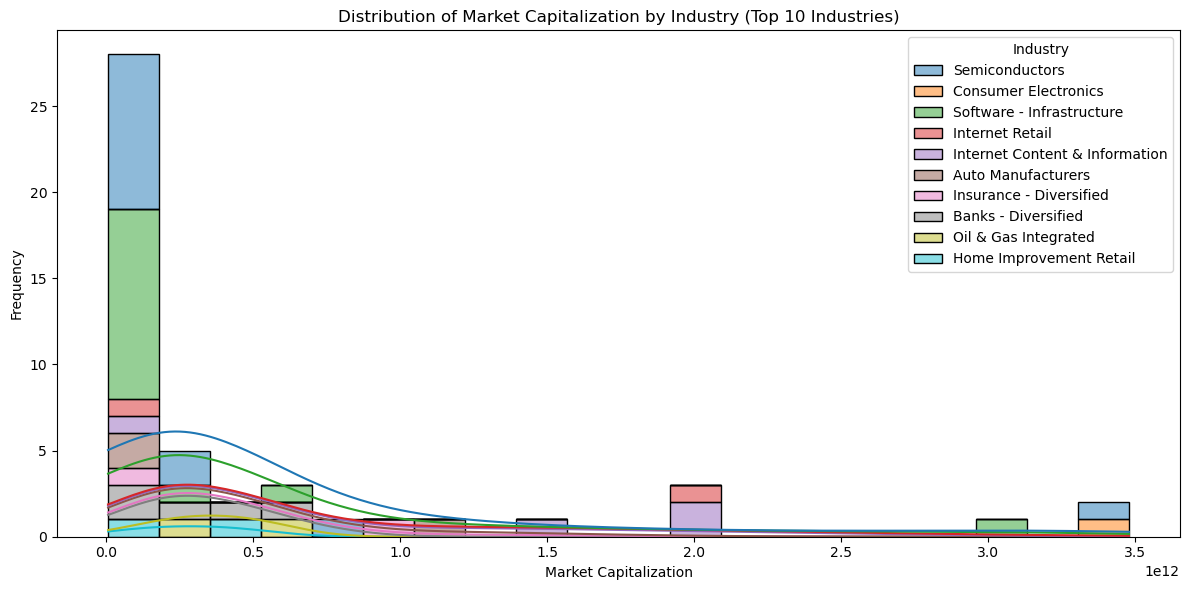

In [158]:
plt.figure(figsize=(12, 6))
sns.histplot(data=top_industries_data, x='Marketcap', hue='Industry', kde=True, multiple='stack', bins=20)
plt.title('Distribution of Market Capitalization by Industry (Top 10 Industries)')
plt.xlabel('Market Capitalization')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Insights:
* The histogram visualizes the distribution of market capitalization for different industries, showing how the market cap is spread across the top 10 industries. 
* It allows for a comparison of how companies within each industry are distributed in terms of their financial size.
* The Semiconductors industry may have a few very large companies, but the majority could be mid-sized or small firms, leading to the high frequency count at certain market cap values (such as between 0.5 and 1.5). 
* Meanwhile, other industries might have a wider distribution of market caps, showing less concentration around a particular bin.

# 3.3.2. Marketcap with other features

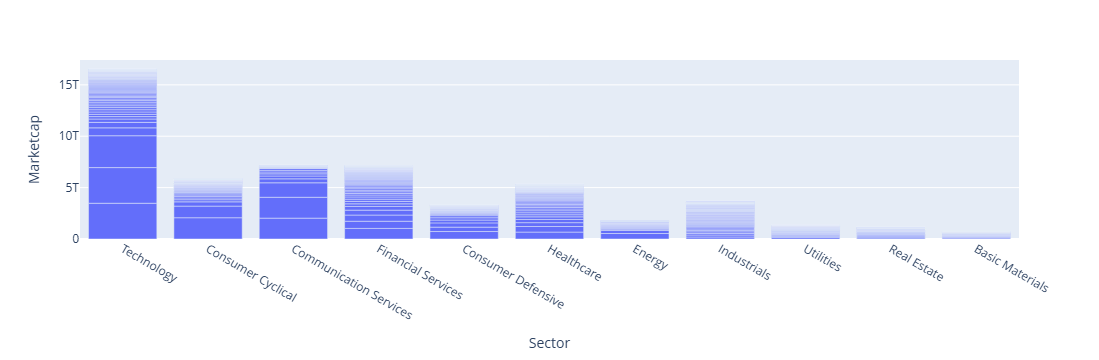

In [163]:
df_info_sorted = comp_data.sort_values(by=["Marketcap"], ascending=False)

fig = px.bar(
    df_info_sorted, 
    x="Sector", 
    y="Marketcap", 
    barmode="stack",
    labels={'Marketcap by Sector'}, 
    height=400
)

fig.show()

## Insights:
* The bar chart shows the total market capitalization by sector, sorted in descending order based on the market cap. 
* This makes it easy to identify which sectors dominate the market in terms of financial value.
* The chart highlights the significant role that the Technology sector plays, especially with a high market cap of 15 trillion, which stands out among other sectors.

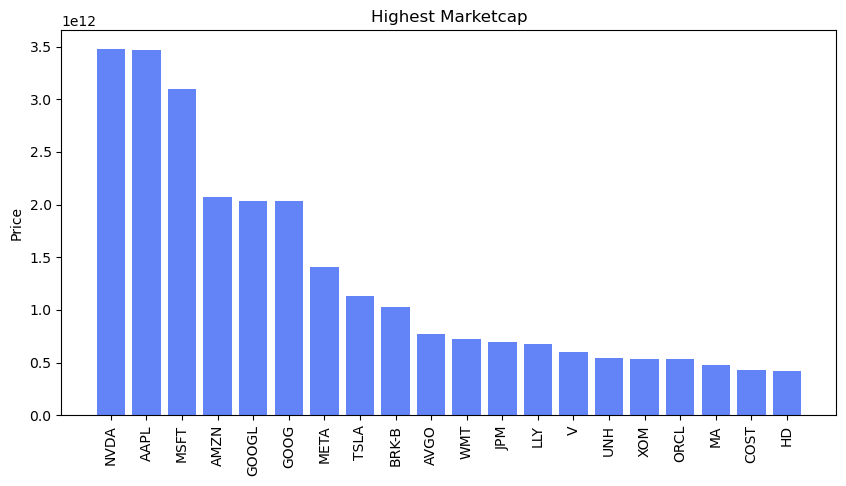

In [165]:
plt.figure(figsize=(10,5))
sorted_marketcap = comp_data.sort_values(by='Marketcap',ascending=False)
plt.bar(sorted_marketcap['Symbol'].iloc[:20],sorted_marketcap['Marketcap'].iloc[:20],color='#6284f7')
plt.title('Highest Marketcap')
plt.ylabel('Price')
plt.xticks(rotation=90);

# Insights:
* This plot provides a clear visual representation of the companies with the highest market capitalizations. The horizontal bars make it easy to compare the market capitalization of different companies within the top 20.
* Companies such as NVIDIA (NVDA) and Apple (AAPL) have similar market capitalizations, both around 3.5 trillion. Similarly, Microsoft (MSFT) has a market cap close to 3.2 trillion, while Amazon (AMZN) and Google (GOOGL) both have market caps around 2.0 trillion
* The smallest market capitalization in this plot is for Mastercard Incorporated,Costco Wholesale Corporation(COST) and Home Depot (HD).

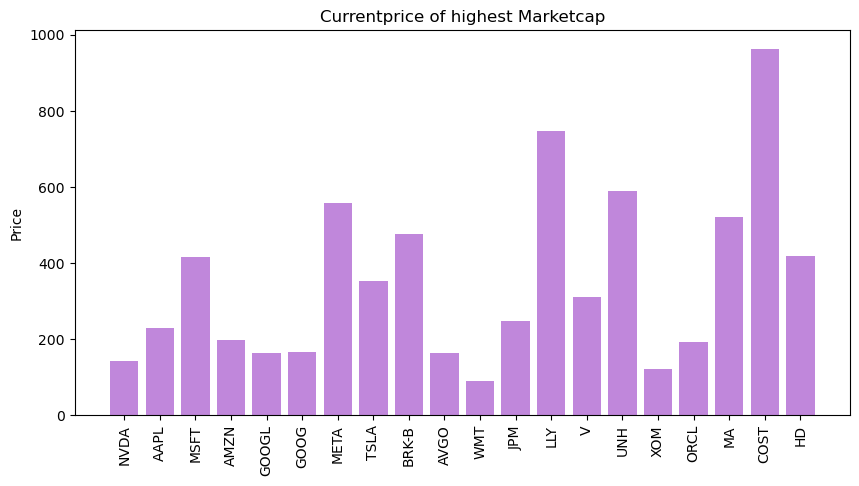

In [167]:
plt.figure(figsize=(10,5))
currentprice_of_highestmarketcap = sorted_marketcap.iloc[:20].Currentprice
plt.bar(sorted_marketcap['Symbol'].iloc[0:20],currentprice_of_highestmarketcap,color='#c087db')
plt.title('Currentprice of highest Marketcap')
plt.ylabel('Price')
plt.xticks(rotation=90);

## Insights:
* This bar chart displays the current stock prices of the top 20 companies sorted by market capitalization.
* It enables a straightforward comparison of stock prices across the largest companies, helping to identify price variations among them.
* Costco Wholesale Corporation (COST) has the highest stock price at approximately $900, followed by Eli Lilly and Co. (LLY) with a stock price around $700.
* On the lower end, Walmart Inc. (WMT) has the least stock price among the top 20 companies.

# 3.4. Distribution Analysis

# 3.4.1.Exchange Distributions

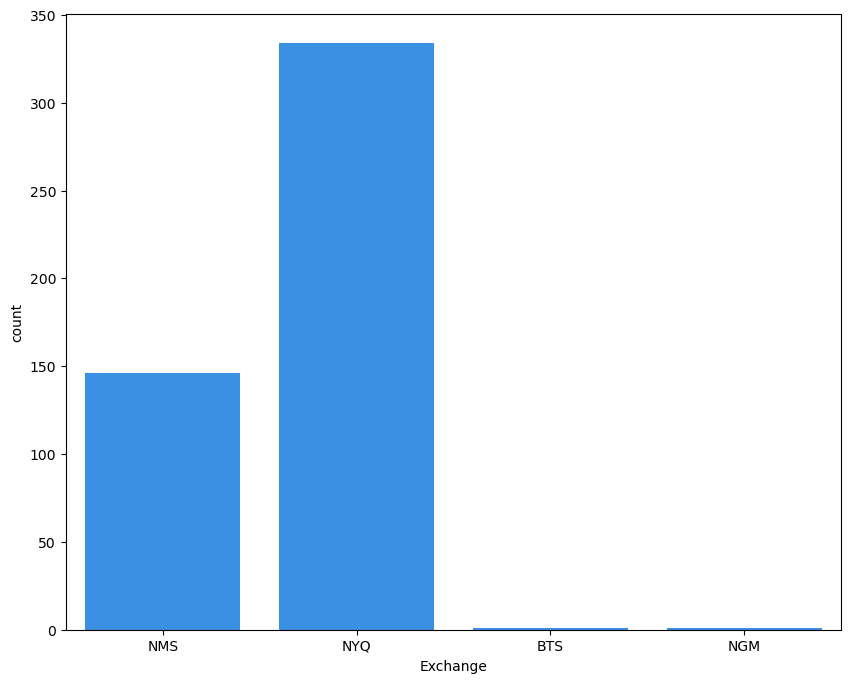

In [181]:
plt.figure(figsize=(10,8))
sns.countplot(data=comp_data, x='Exchange', color='dodgerblue')
plt.show()

# Insights:
* NYQ (New York Stock Exchange) and NGM 
* NYQ have significantly higher counts (320) compared to other exchanges like NMS (120), indicating that the dataset is more heavily weighted towards these exchanges.

# 3.4.2.Revenue Growth Distributions

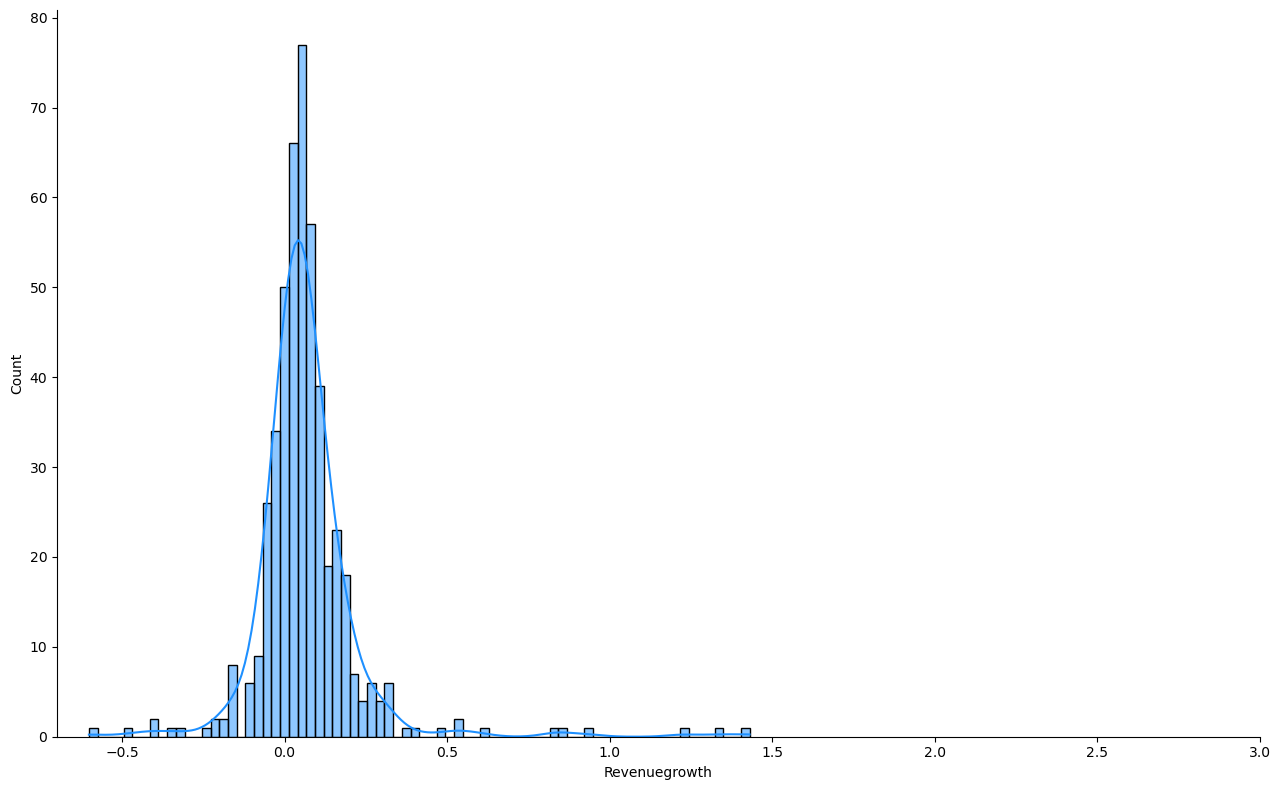

In [188]:
sns.displot(data=comp_data, x='Revenuegrowth', height=8, aspect=1.6, kde=True, color='dodgerblue')
plt.xlim(-0.7,3)
plt.show()

# Insights:
* This is a positively skewed distribution.
* There were some outliers, along the values 5.0, hence the graph was scaled down.
* We can see that most of the companies' revenue growth is around 0.2.
* There are some negative revenue growth which show there is decline in few companies's sales or earnings, or a decrease in an economy's GDP during any quarter.

# 3.4.3.Distribution of Current Price

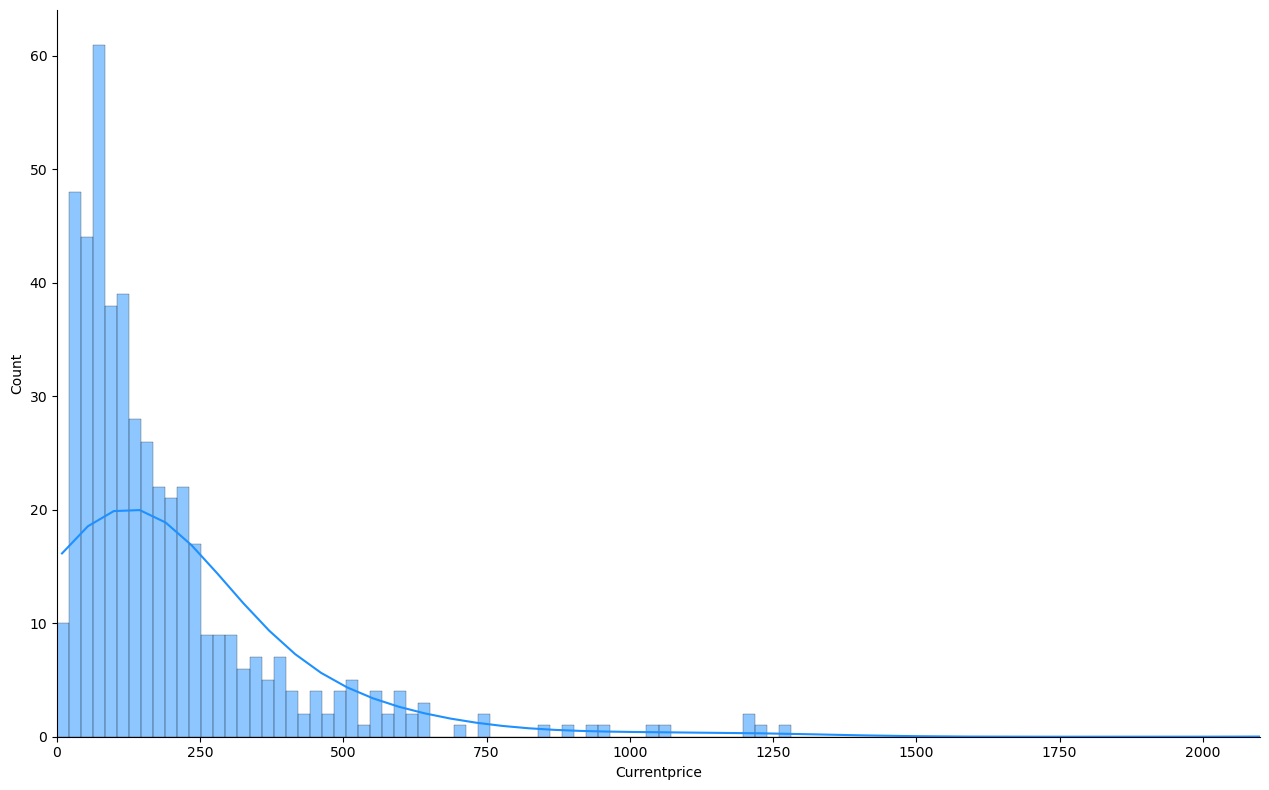

In [192]:
sns.displot(data=comp_data, x='Currentprice', kde=True, height=8, aspect=1.6, bins=100, binrange=(0, 2100), color='dodgerblue')
plt.xlim(0, 2100)
plt.show()

# Insights:
* The distribution of Current Price is skewed right that means, the vast majority of stocks in S&P 500 have low current price as compared to few minority stocks outliers seen on the right side of the plot.
* Also, there are seem to be 2 distinct groups that has the highest count of Current Price, which seems to be between 50-150.

# 3.5.Top 10 Industries distribution based on features

In [210]:
top_comp_mkt_cap=comp_data[['Symbol','Currentprice','Marketcap','Ebitda','Revenuegrowth','Fulltimeemployees','Weight']].sort_values(by='Marketcap', ascending=False).head(10)
top_comp_mkt_cap

Symbol  Currentprice     Marketcap        Ebitda  Revenuegrowth  \
0   NVDA        141.95  3.480000e+12  6.118400e+10          1.224   
1   AAPL        229.87  3.470000e+12  1.350000e+11          0.061   
2   MSFT        417.00  3.100000e+12  1.370000e+11          0.160   
3   AMZN        197.12  2.070000e+12  1.120000e+11          0.110   
4  GOOGL        164.76  2.030000e+12  1.230000e+11          0.151   
5   GOOG        166.57  2.030000e+12  1.230000e+11          0.151   
6   META        559.14  1.410000e+12  7.920900e+10          0.189   
7   TSLA        352.56  1.130000e+12  1.324400e+10          0.078   
8  BRK-B        476.57  1.030000e+12  1.500000e+11         -0.002   
9   AVGO        164.23  7.670000e+11  2.295800e+10          0.164   

   Fulltimeemployees    Weight  
0            29600.0  0.062610  
1           164000.0  0.062579  
2           228000.0  0.055838  
3          1551000.0  0.037330  
4           181269.0  0.036504  
5           181269.0  0.036504  
6            72404.0  0.025422  
7           140473.0  0.020383  
8           396500.0  0.018503  
9            20000.0  0.013815

# 3.5.1.Mean Market Capitalization by Industry (Top 10)

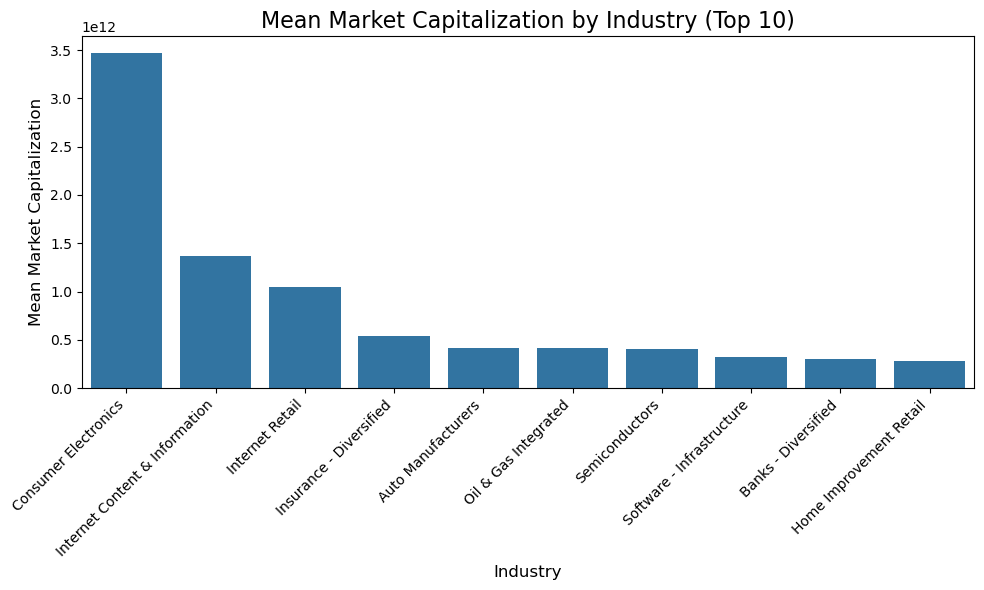

In [215]:
plt.figure(figsize=(10, 6))
sns.barplot(data=industry_marketcap, x='Industry', y='Marketcap')
plt.title('Mean Market Capitalization by Industry (Top 10)', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Mean Market Capitalization', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interpretation: 
* The plot provides insights into which industries have the highest average market capitalization, helping to identify the most valuable sectors in the market.

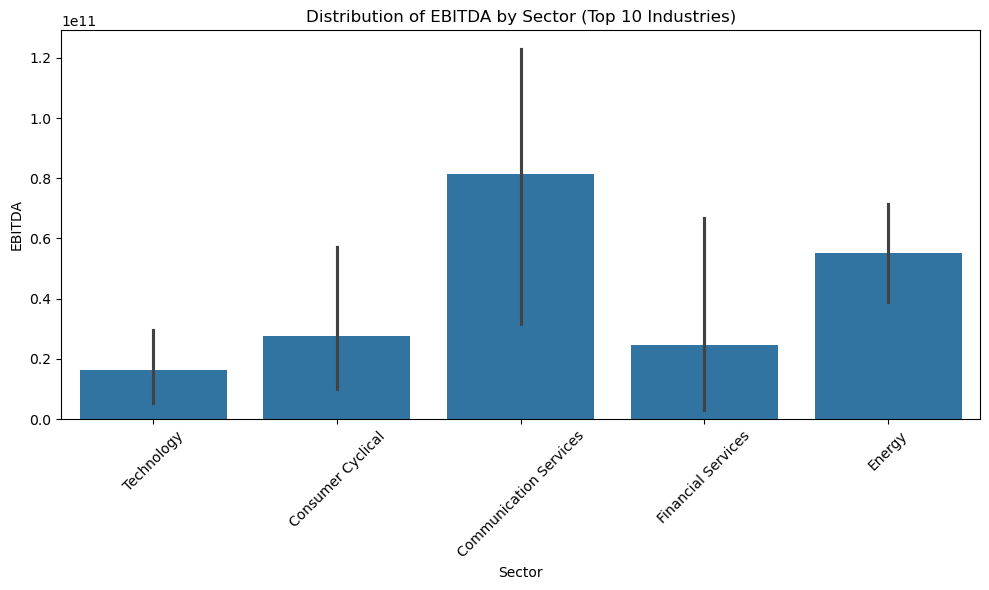

In [217]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_industries_data, x='Sector', y='Ebitda')
plt.title('Distribution of EBITDA by Sector (Top 10 Industries)')
plt.xlabel('Sector')
plt.ylabel('EBITDA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights:
* This bar plot shows the distribution of EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization) across different sectors for the top 10 industries, with each bar representing the EBITDA for a sector.
* The plot allows comparison of EBITDA across sectors, providing insights into which sectors are generating the highest operational profits before accounting for interest, taxes, and depreciation.

# 3.5.2.Relationship between Revenue Growth and Market Capitalization (Top 10 Industries)

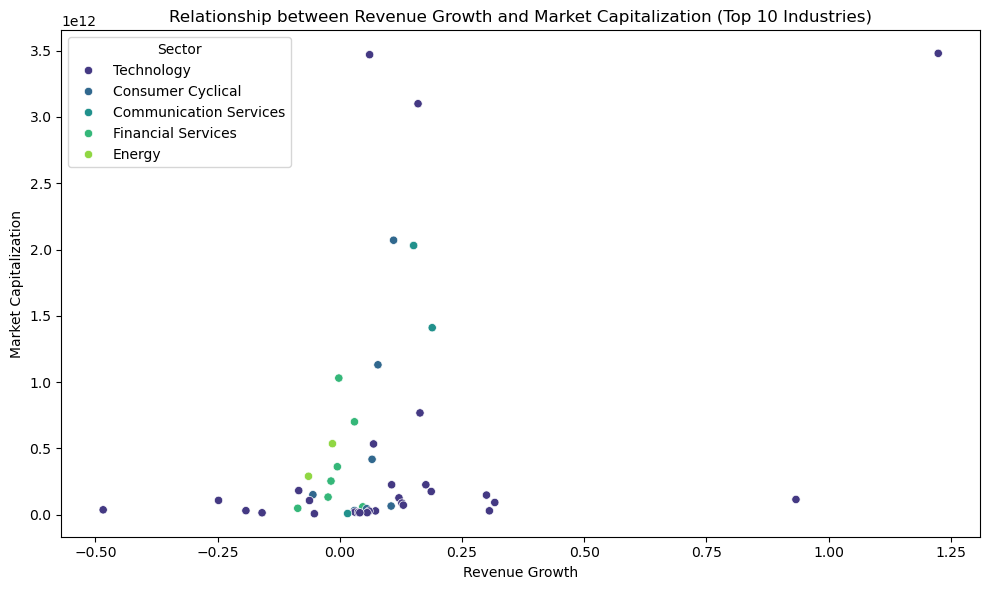

In [220]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_industries_data, x='Revenuegrowth', y='Marketcap', hue='Sector', palette='viridis')
plt.title('Relationship between Revenue Growth and Market Capitalization (Top 10 Industries)')
plt.xlabel('Revenue Growth')
plt.ylabel('Market Capitalization')
plt.tight_layout()
plt.show()

# Interpretation:
The plot provides insights into whether sectors with higher revenue growth tend to have larger market capitalizations, allowing for an assessment of the relationship between a company’s growth rate and its market value.

# 3.5.3.Distribution of Revenue Growth by Industry (Top 10 Industries)

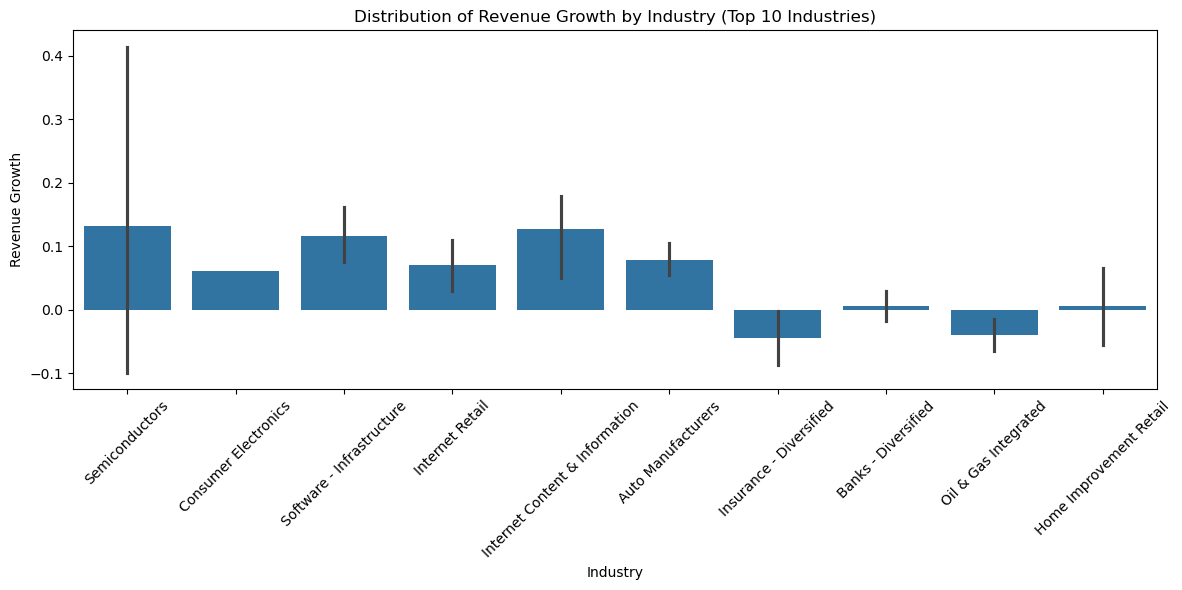

In [223]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_industries_data, x='Industry', y='Revenuegrowth')
plt.title('Distribution of Revenue Growth by Industry (Top 10 Industries)')
plt.xlabel('Industry')
plt.ylabel('Revenue Growth')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4.Index Performance

# 4.1.S&P 500 Index value

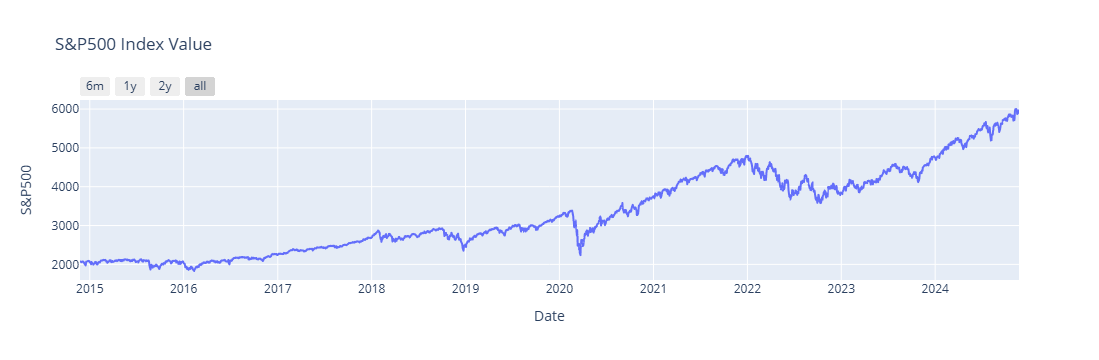

In [202]:
import plotly.express as px

fig = px.line(index_data, x="Date", y="S&P500", title='S&P500 Index Value')

fig.update_xaxes(rangeslider_visible=False, rangeselector=dict(
    buttons=[dict(count=6, label="6m", step="month", stepmode="backward"),
             dict(count=1, label="1y", step="year", stepmode="backward"),
             dict(count=2, label="2y", step="year", stepmode="backward"),
             dict(step="all")]))
    
fig.show()

# Insights:
* The gradual increase from 2015 to 2020 reflects positive economic conditions and market growth.
* The peak and downturn likely correspond to a market correction or crisis, such as the early impact of COVID-19 in 2020.
* The recovery following the downturn indicates a strong rebound in the market

# 4.2.S&P 500 Monthly Returns - Last 12 Months

In [234]:
index_data['Date'] = pd.to_datetime(index_data['Date'])
index_data.set_index('Date', inplace=True)
index_data.sort_index(inplace=True)
monthly_data = index_data['S&P500'].resample('M').last()
monthly_returns = monthly_data.pct_change() * 100
last_12_months_returns = monthly_returns.tail(12)
print(last_12_months_returns)

Date
2023-12-31    4.422917
2024-01-31    1.589574
2024-02-29    5.172062
2024-03-31    3.101876
2024-04-30   -4.161504
2024-05-31    4.802122
2024-06-30    3.466976
2024-07-31    1.132135
2024-08-31    2.283469
2024-09-30    2.019687
2024-10-31   -0.989678
2024-11-30    4.625227
Freq: ME, Name: S&P500, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_15080\1640172859.py:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



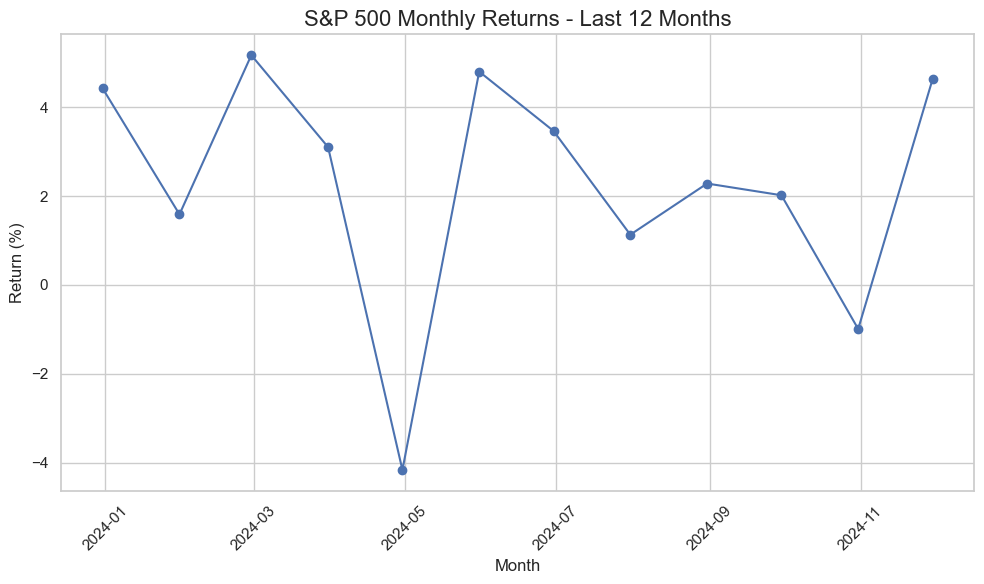

In [236]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(last_12_months_returns.index, last_12_months_returns, marker='o', color='b', label="Monthly Return")
plt.title('S&P 500 Monthly Returns - Last 12 Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Return (%)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

# Interpretation:
* The graph provides a clear view of the S&P 500's performance fluctuations over the past year, highlighting positive and negative return months, along with the overall volatility in market returns.
* In 2024, the S&P 500 experienced significant volatility, with a sharp drop of -4% in May, followed by a modest decline of 0% to -2% from September to October, and a strong recovery with a +4% increase in November.

# 5.Closing Price, Sales Volumes & Trend Analysis of Company

# 5.1. Closing Price of Companies

In [240]:
company_name = ['MSFT', 'AAPL', 'NVDA', 'GOOG', 'AMZN', 'META']


company_dfs = {}

for company in company_name:
    company_dfs[company] = stocks_data[stocks_data['Symbol'] == company]

MSFT = company_dfs['MSFT']
AAPL = company_dfs['AAPL']
NVDA = company_dfs['NVDA']
GOOG = company_dfs['GOOG']
AMZN = company_dfs['AMZN']
META = company_dfs['META']

In [242]:
company_list = [MSFT, AAPL, NVDA, GOOG, AMZN, META]
MSFT.set_index('Date', inplace=True)
AAPL.set_index('Date', inplace=True)
NVDA.set_index('Date', inplace=True)
GOOG.set_index('Date', inplace=True)
AMZN.set_index('Date', inplace=True)
META.set_index('Date', inplace=True)

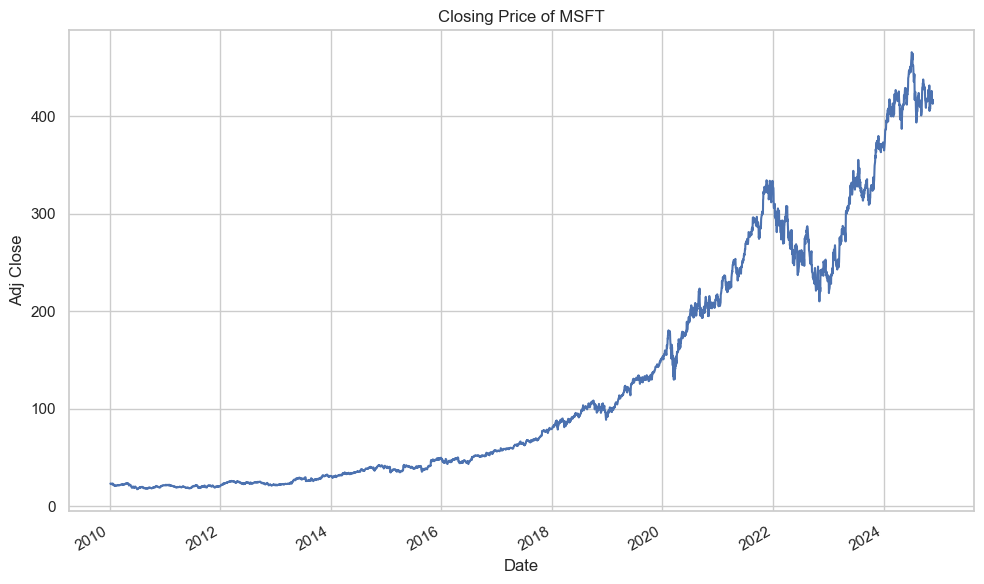

In [244]:
# Plot for MSFT
plt.figure(figsize=(10, 6))
MSFT['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.title("Closing Price of MSFT")
plt.tight_layout() 
plt.show()

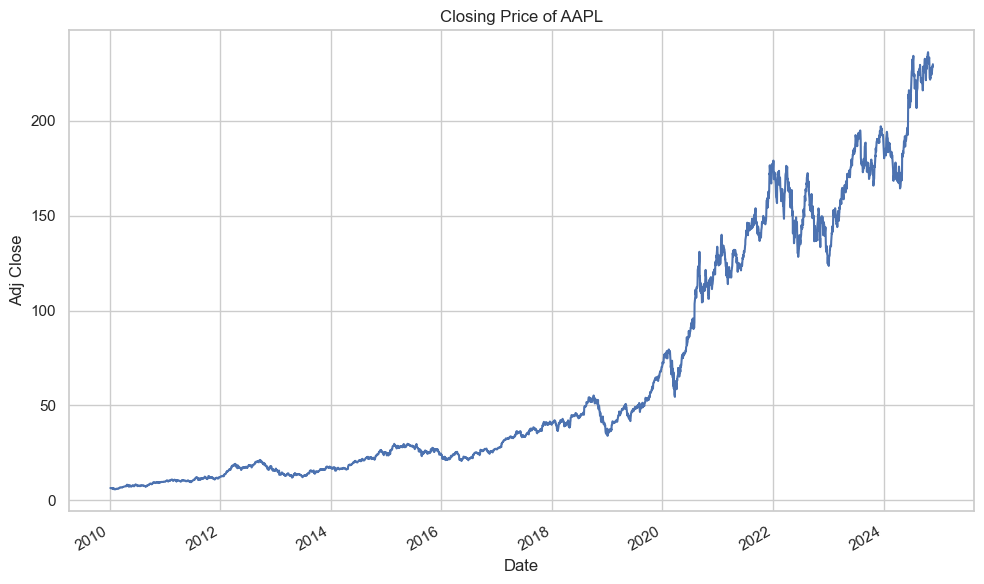

In [246]:
# Plot for AAPL
plt.figure(figsize=(10, 6))
AAPL['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.title("Closing Price of AAPL")
plt.tight_layout() 
plt.show()

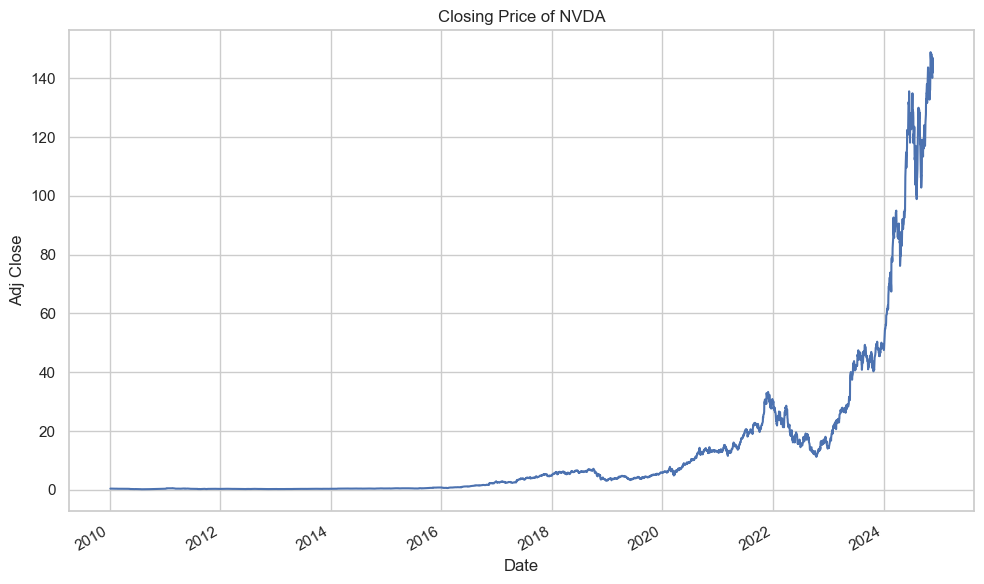

In [269]:
# Plot for NVDA
plt.figure(figsize=(10, 6))
NVDA['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.title("Closing Price of NVDA")
plt.tight_layout()  
plt.show()

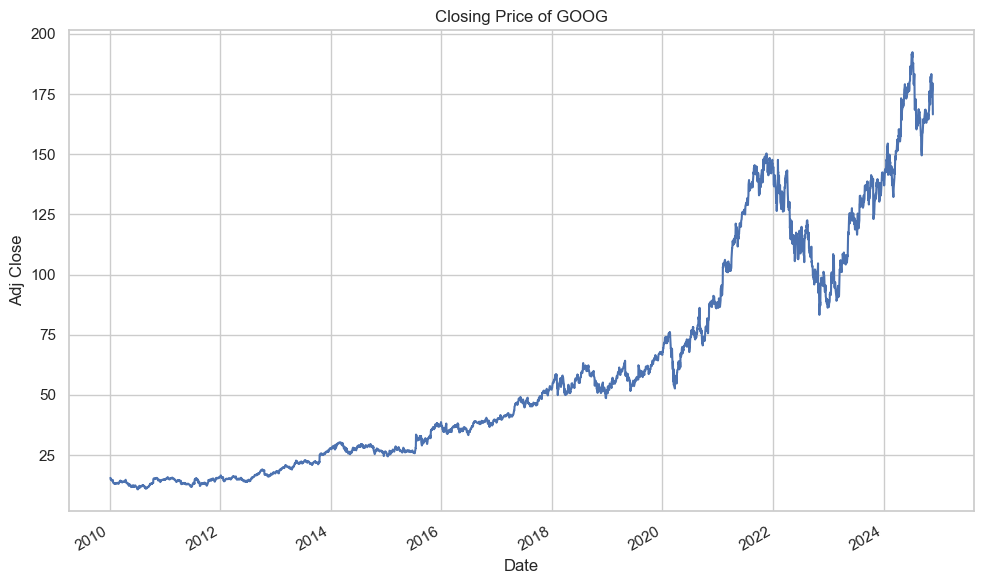

In [248]:
# Plot for GOOG
plt.figure(figsize=(10, 6))
GOOG['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.title("Closing Price of GOOG")
plt.tight_layout()  
plt.show()

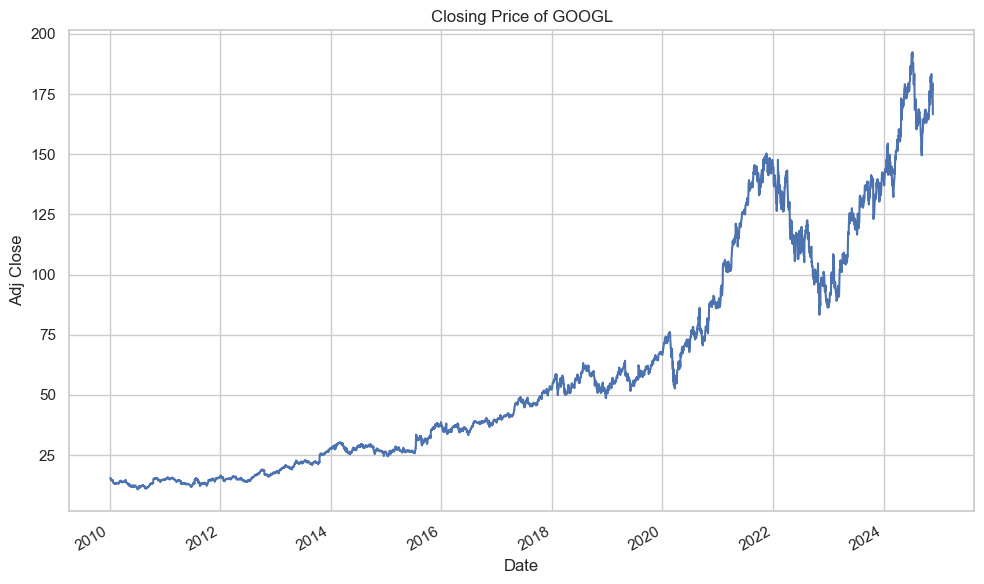

In [250]:
# Plot for GOOG
plt.figure(figsize=(10, 6))
GOOG['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.title("Closing Price of GOOGL")
plt.tight_layout()  
plt.show()

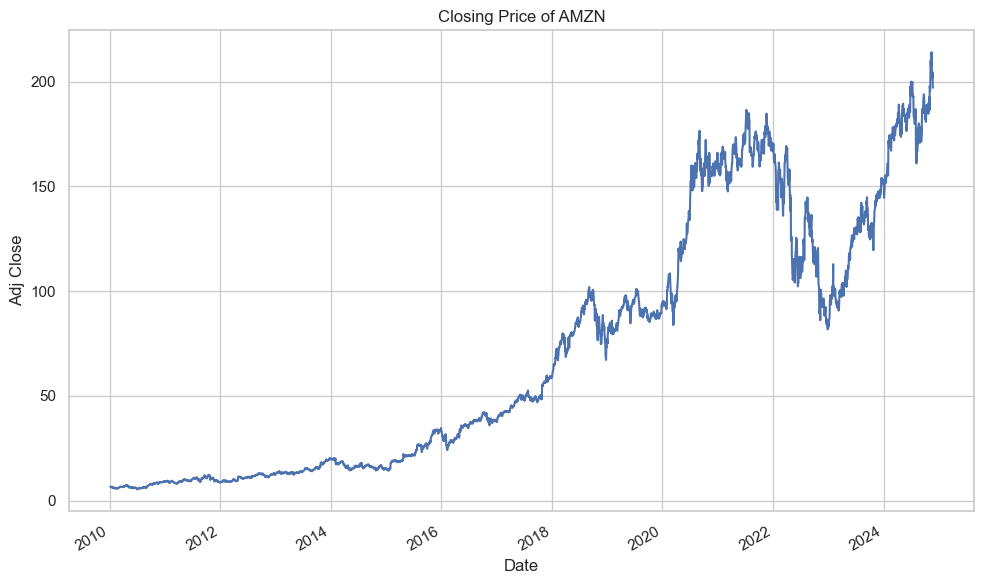

In [252]:
# Plot for AMZN
plt.figure(figsize=(10, 6))
AMZN['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.title("Closing Price of AMZN")
plt.tight_layout()
plt.show()

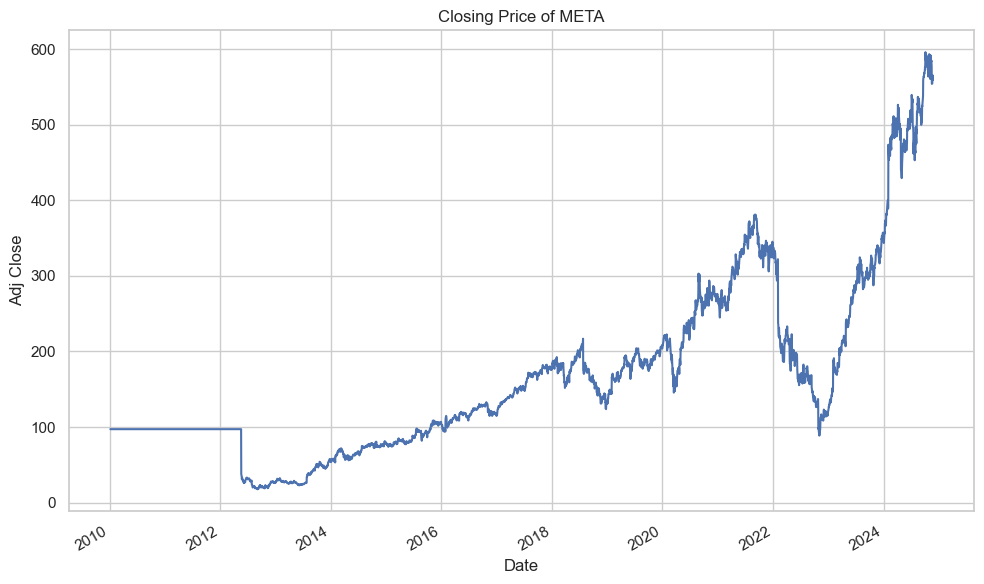

In [254]:
# Plot for META
plt.figure(figsize=(10, 6))
META['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.title("Closing Price of META")
plt.tight_layout() 
plt.show()

# Observations:
* Overall Trends: The adjusted closing prices for the selected stocks (META, MSFT, AAPL, NVDA, GOOG, AMZN) show long-term growth trends alongside periods of volatility. 
* Adjusted closing prices take into account stock splits, dividends, and other corporate actions, making them ideal for understanding the true value of an investment over time.

# 5.2.Sales Volume for company

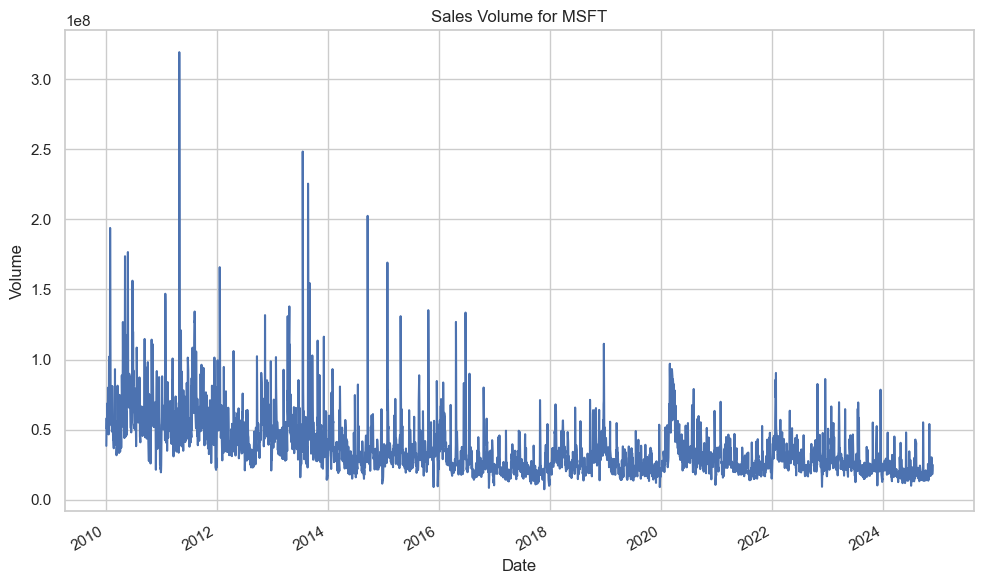

In [257]:
# Plot for MSFT
plt.figure(figsize=(10, 6))
MSFT['Volume'].plot()
plt.ylabel('Volume')
plt.title("Sales Volume for MSFT")
plt.tight_layout()  
plt.show()

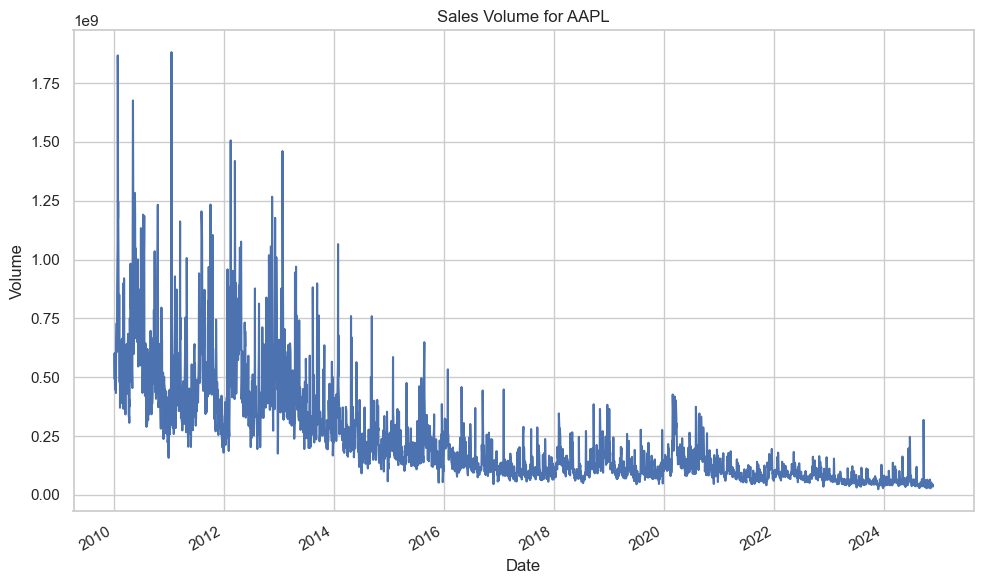

In [259]:
# Plot for AAPL
plt.figure(figsize=(10, 6))
AAPL['Volume'].plot()
plt.ylabel('Volume')
plt.title("Sales Volume for AAPL")
plt.tight_layout() 
plt.show()

In [ ]:
MSFT', 'AAPL', 'NVDA', 'GOOG', 'AMZN', 'META

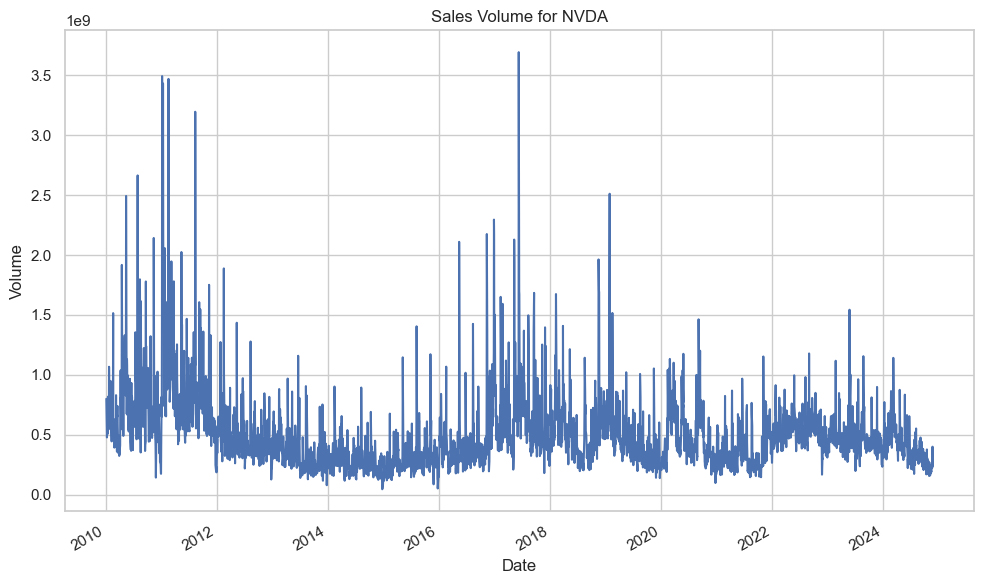

In [261]:
# Plot for NVDA
plt.figure(figsize=(10, 6))
NVDA['Volume'].plot()
plt.ylabel('Volume')
plt.title("Sales Volume for NVDA")
plt.tight_layout()  
plt.show()

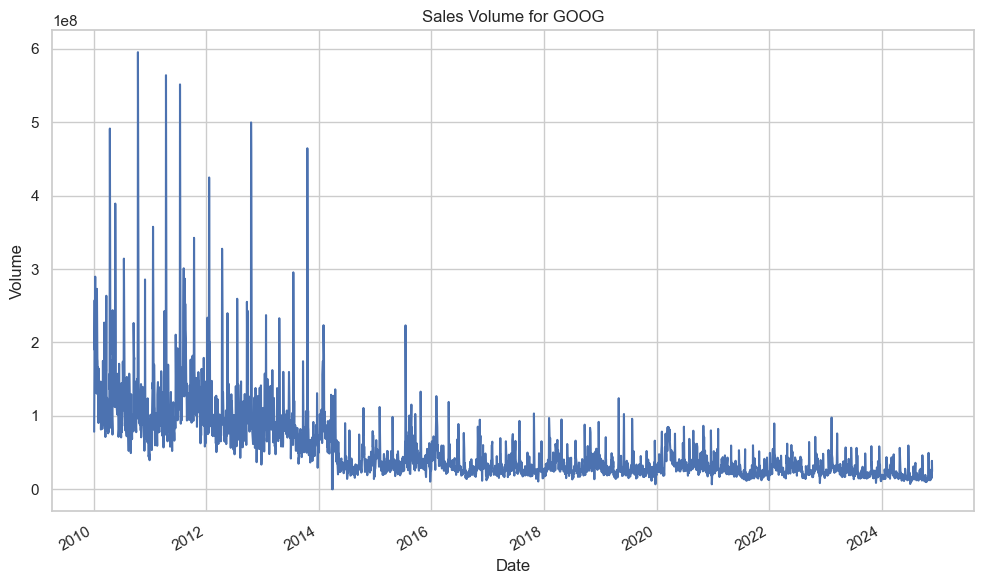

In [263]:
# Plot for GOOG
plt.figure(figsize=(10, 6))
GOOG['Volume'].plot()
plt.ylabel('Volume')
plt.title("Sales Volume for GOOG")
plt.tight_layout() 
plt.show()

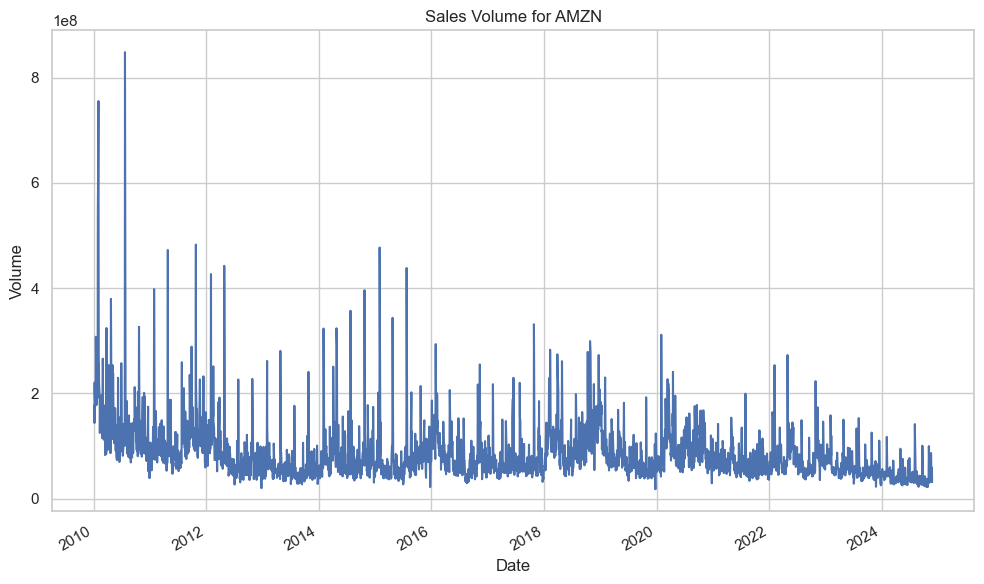

In [265]:
# Plot for AMZN
plt.figure(figsize=(10, 6))
AMZN['Volume'].plot()
plt.ylabel('Volume')
plt.title("Sales Volume for AMZN")
plt.tight_layout() 
plt.show()

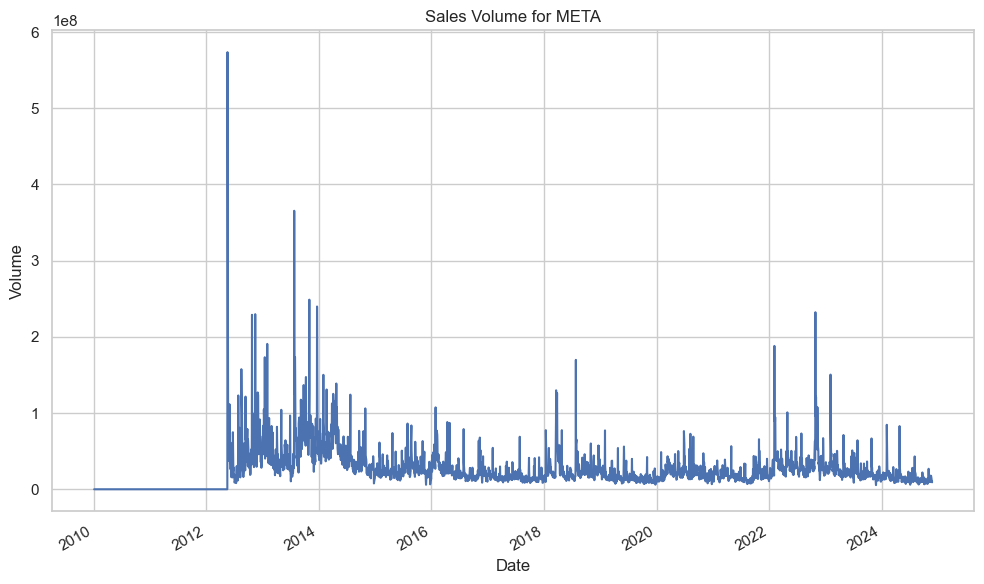

In [267]:
# Plot for META
plt.figure(figsize=(10, 6))
META['Volume'].plot()
plt.ylabel('Volume')
plt.title("Sales Volume for META")
plt.tight_layout()  
plt.show()

# Observations:
* The sales volumes for the selected stocks (META, MSFT, AAPL, NVDA, GOOG, AMZN) show fluctuations that typically correlate with market events, earnings announcements, product launches, or broader market trends. 
* Periods of high trading volumes usually indicate increased investor interest or market volatility, while lower volumes may reflect more stable or quieter periods in the market.

# 5.3.Trend Analysis

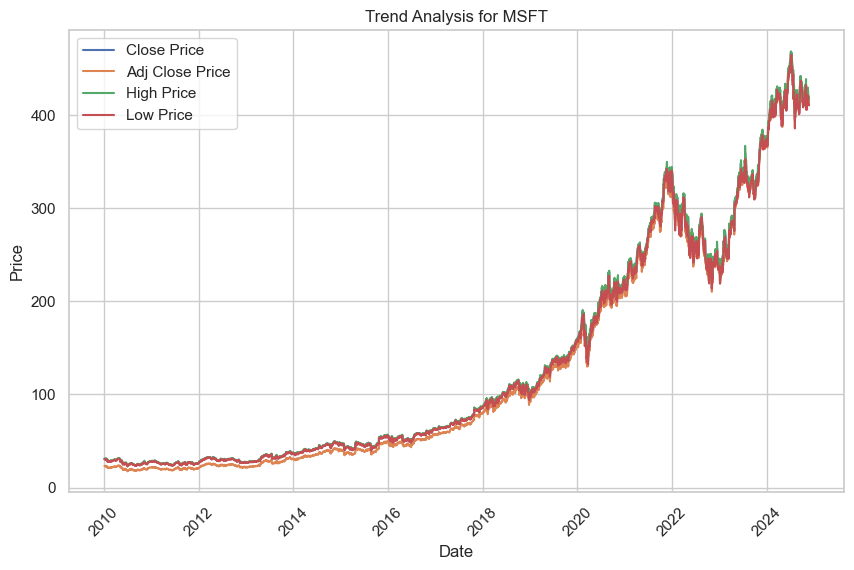

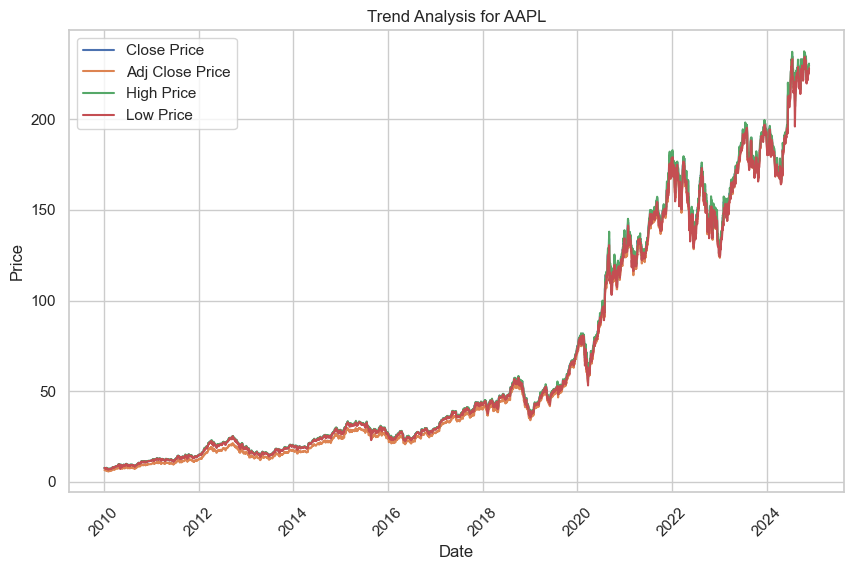

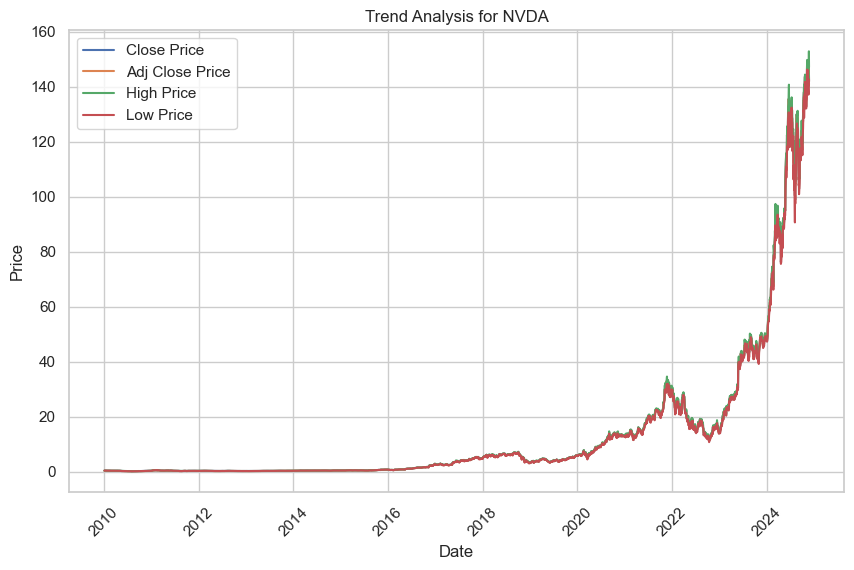

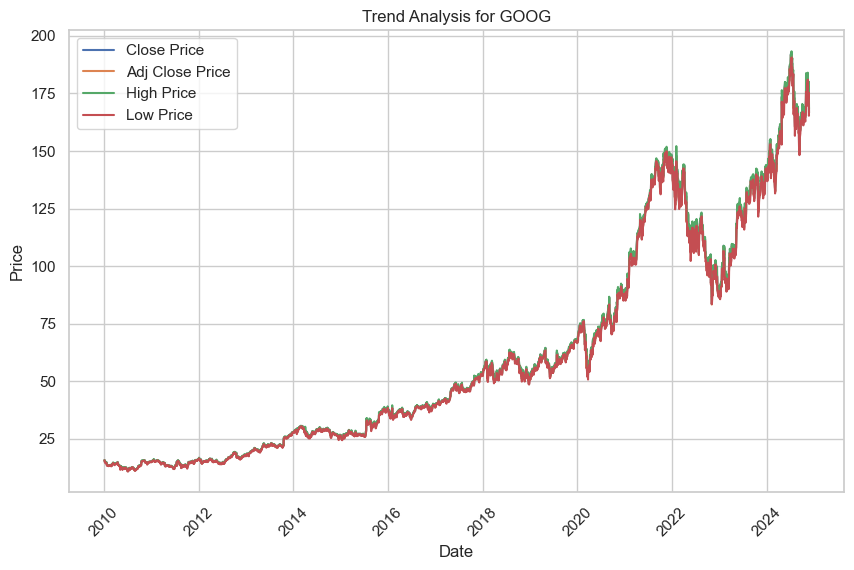

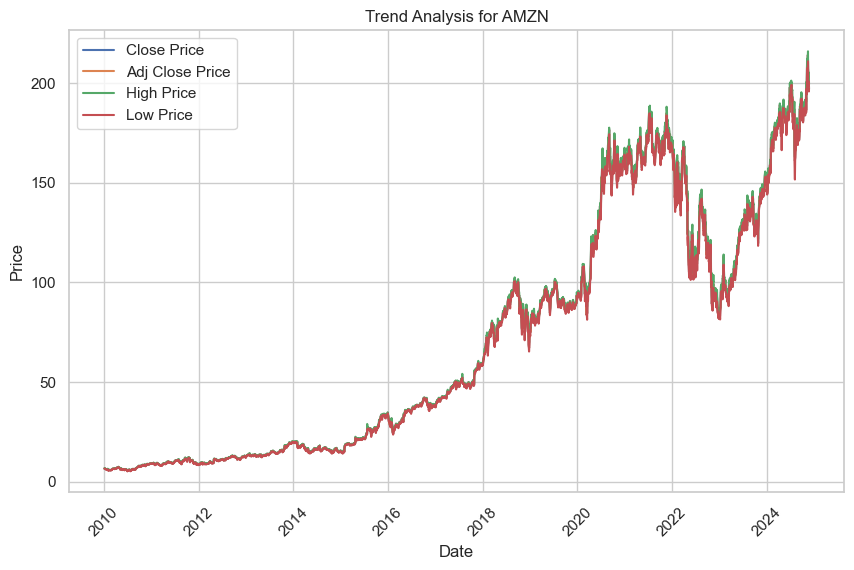

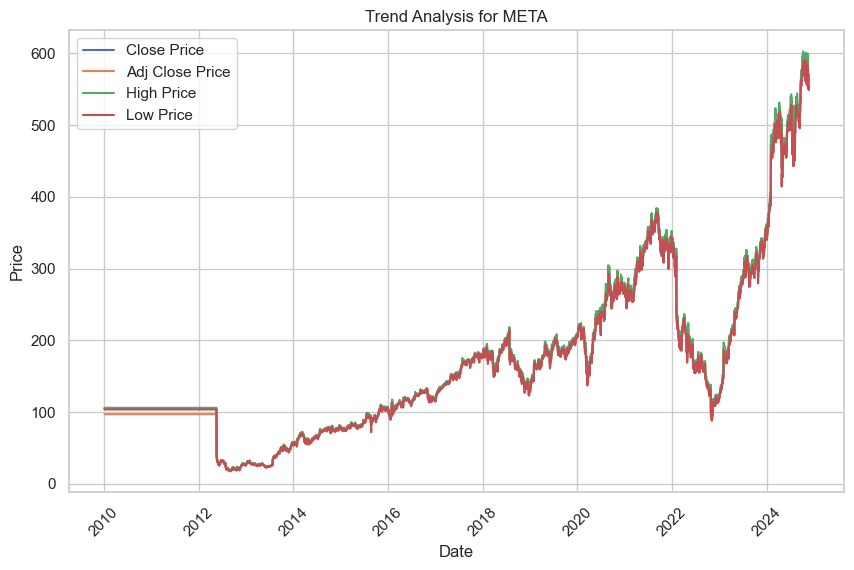

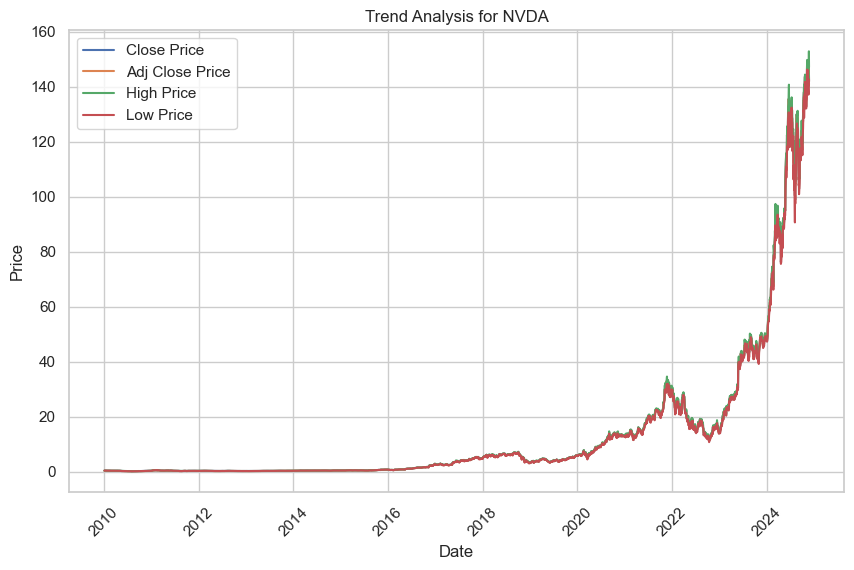

In [272]:
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
selected_stocks = ['MSFT', 'AAPL', 'NVDA', 'GOOG', 'AMZN', 'META','NVDA']
stocks_data_filtered = stocks_data[stocks_data['Symbol'].isin(selected_stocks)]


for stock in selected_stocks:
    stock_data = stocks_data_filtered[stocks_data_filtered['Symbol'] == stock]
    
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Adj Close Price')
    plt.plot(stock_data['Date'], stock_data['High'], label='High Price')
    plt.plot(stock_data['Date'], stock_data['Low'], label='Low Price')
    plt.title(f'Trend Analysis for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Observations:
* Each plot visualizes how different price metrics (Close, Adjusted Close, High, Low) have evolved over time for each selected stock. This allows for a clear comparison of the stock's performance over a period.
* The user can easily compare how the stock's regular close price differs from its adjusted close price, and how the high and low prices vary during the same period.

# 6.ML Models

# Importing models and Splitting Target & Features

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [278]:
numerical_columns=comp_data.select_dtypes(include="number").columns
categorical_columns=comp_data.select_dtypes(include="object").columns

In [280]:
numerical_columns

Index(['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth',
       'Fulltimeemployees', 'Weight'],
      dtype='object')

In [282]:
categorical_columns

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'City', 'State', 'Country', 'Longbusinesssummary'],
      dtype='object')

In [284]:
X_categorical = pd.get_dummies(comp_data[categorical_columns])

In [288]:
X_numerical = comp_data[numerical_columns]

In [290]:
X = pd.concat([X_categorical, X_numerical], axis=1)
y = comp_data['Currentprice'] 

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6.1.Linear Regression Model

In [296]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [298]:
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression:")
print("R-squared:", r2_score(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))

Linear Regression:
R-squared: 0.9999999999999961
Mean Squared Error: 3.010332298925338e-10


# 6.2. DecisionTree Model

In [301]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [303]:
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree Regressor:")
print("R-squared:", r2_score(y_test, y_pred_dt))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Regressor:
R-squared: 0.8370180691380468
Mean Squared Error: 12523.289571134019


# 6.3.RandomForest Model

In [306]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [308]:
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Regressor:")
print("R-squared:", r2_score(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))


Random Forest Regressor:
R-squared: 0.9963121319569453
Mean Squared Error: 283.37030466538397


# 7. Time Series Forecasting

# ARIMA Model

# 7.1.check for Stationarity for S&P 500

In [318]:
index_data['S&P500_diff'] = index_data['S&P500'].diff()
ind_diff = index_data['S&P500_diff'].dropna()
result = adfuller(ind_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -10.33365590264954
p-value: 2.8000679960993906e-18
Critical Values: {'1%': -3.4329799947351503, '5%': -2.862701915447137, '10%': -2.5673885329713495}


If the ADF Statistic is less than the critical values  the p-value is less than 0.05, then you can conclude that the differenced series is stationary.
If the p-value is greater than 0.05, the series likely remains non-stationary, and you might need to take further differencing or other transformations to make the series stationary.

# 7.2.Decomposition of S&P 500

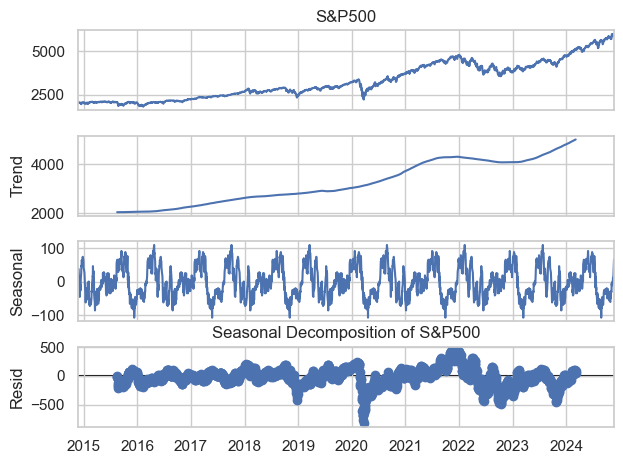

In [321]:
decomposition = seasonal_decompose(index_data['S&P500'], model='additive', period=365)
decomposition.plot()
plt.title('Seasonal Decomposition of S&P500')
plt.show()

# 7.3.Autocorrelation and Partial Autocorrelation Plots

<Figure size 1200x600 with 0 Axes>

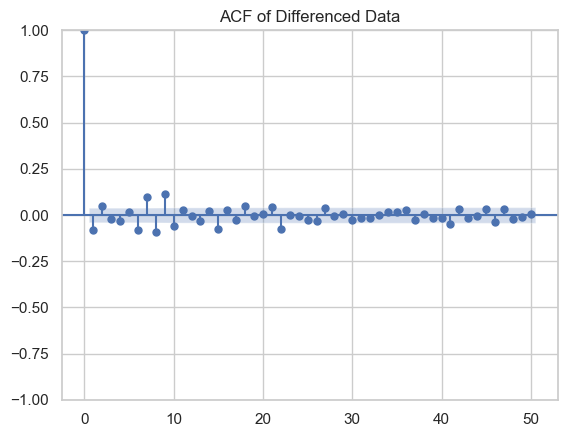

<Figure size 1200x600 with 0 Axes>

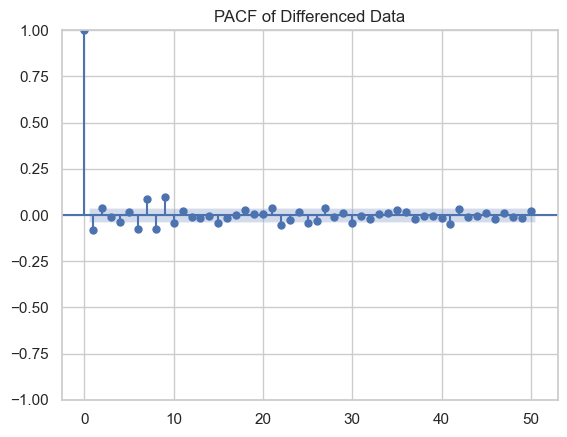

In [324]:
plt.figure(figsize=(12, 6))
plot_acf(ind_diff, lags=50)
plt.title('ACF of Differenced Data')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(ind_diff, lags=50)
plt.title('PACF of Differenced Data')
plt.show()

# 7.4.Model Building and Forecasting for S&P 500

In [333]:
model = ARIMA(index_data['S&P500'], order=(1, 1, 1))  
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [335]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 S&P500   No. Observations:                 2517
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12651.142
Date:                Fri, 29 Nov 2024   AIC                          25308.284
Time:                        13:57:06   BIC                          25325.776
Sample:                             0   HQIC                         25314.632
                               - 2517                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3864      0.095     -4.064      0.000      -0.573      -0.200
ma.L1          0.3054      0.099      3.086      0.002       0.111       0.499
sigma2      1366.0077     19.154     71.317      0.0

#  7.5.Visualize the forecast

In [5]:
index_data = pd.read_csv(r"D:\Data Science\sp500_index.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_15080\1467654375.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



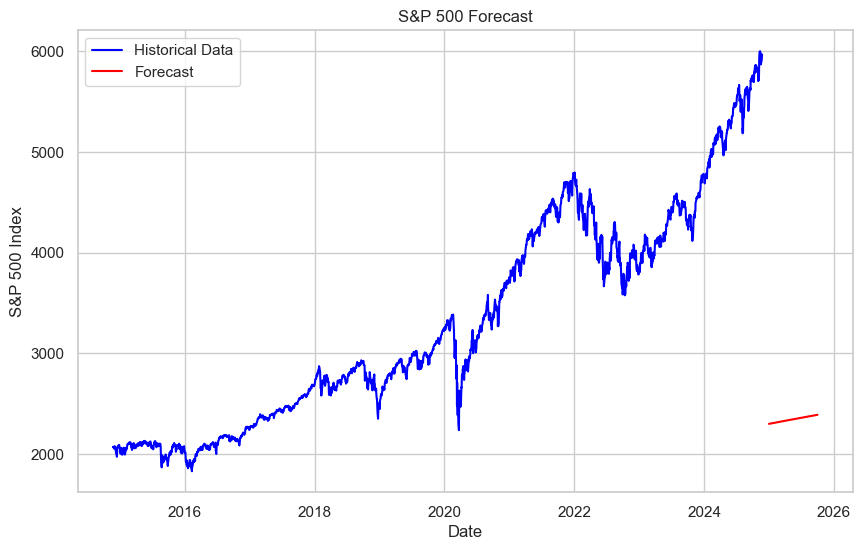

In [341]:

index_data['Date'] = pd.to_datetime(index_data['Date'], errors='coerce')
index_data.set_index('Date', inplace=True)

forecast = [2300, 2310, 2320, 2330, 2340, 2350, 2360, 2370, 2380, 2390]
future_dates = pd.date_range(index_data.index[-1], periods=len(forecast) + 1, freq='M')[1:]
plt.figure(figsize=(10, 6))
plt.plot(index_data.index, index_data['S&P500'], label='Historical Data', color='blue')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.title('S&P 500 Forecast')
plt.xlabel('Date')
plt.ylabel('S&P 500 Index')
plt.legend()
plt.show()

# Prophet Model

In [103]:
from prophet import Prophet

In [105]:
index_data = pd.read_csv(r"D:\Data Science\sp500_index.csv")

In [107]:
df_reset = index_data.reset_index()

# Now you can select and rename the columns as desired
df = index_data[['Date', 'S&P500']].rename(columns={'Date': 'ds', 'S&P500': 'y'})
print(df.head())

           ds        y
0  2014-11-24  2069.41
1  2014-11-25  2067.03
2  2014-11-26  2072.83
3  2014-11-28  2067.56
4  2014-12-01  2053.44


In [109]:
m = Prophet()
m.fit(df)

12:39:27 - cmdstanpy - INFO - Chain [1] start processing
12:39:29 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
future = m.make_future_dataframe(periods=10)
future.tail()

ds
2522 2024-11-28
2523 2024-11-29
2524 2024-11-30
2525 2024-12-01
2526 2024-12-02

In [357]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2522 2024-11-28  5819.873745  5678.571033  5958.041792
2523 2024-11-29  5821.353281  5678.422431  5960.054447
2524 2024-11-30  5811.740804  5675.511887  5949.091824
2525 2024-12-01  5812.484157  5671.949865  5959.835881
2526 2024-12-02  5823.027533  5676.842656  5955.580545

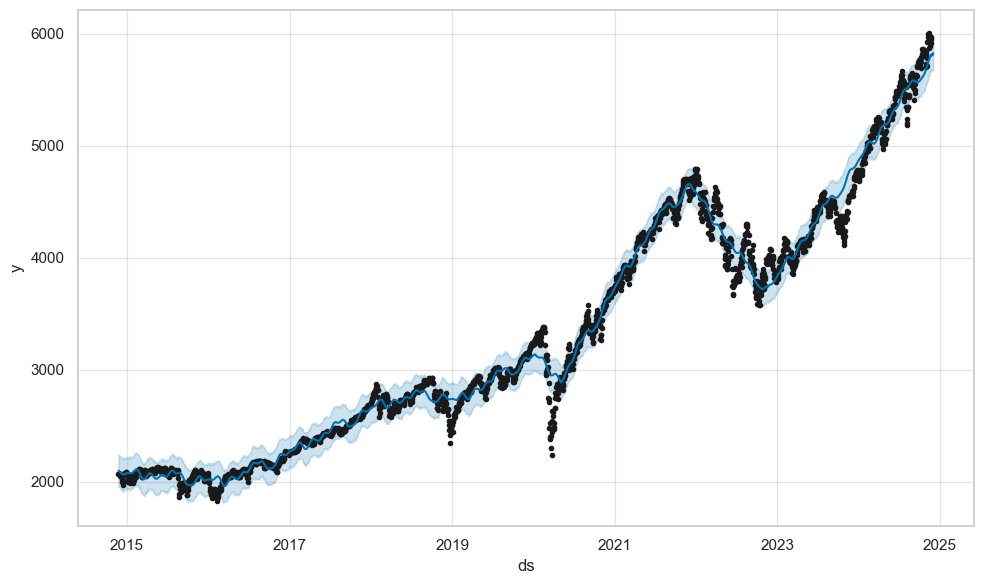

In [359]:
fig1 = m.plot(forecast)

The m.plot function visualizes the historical data, predictions (yhat), and uncertainty intervals (yhat_lower and yhat_upper).
The resulting figure shows both the original time series and the predicted future values.

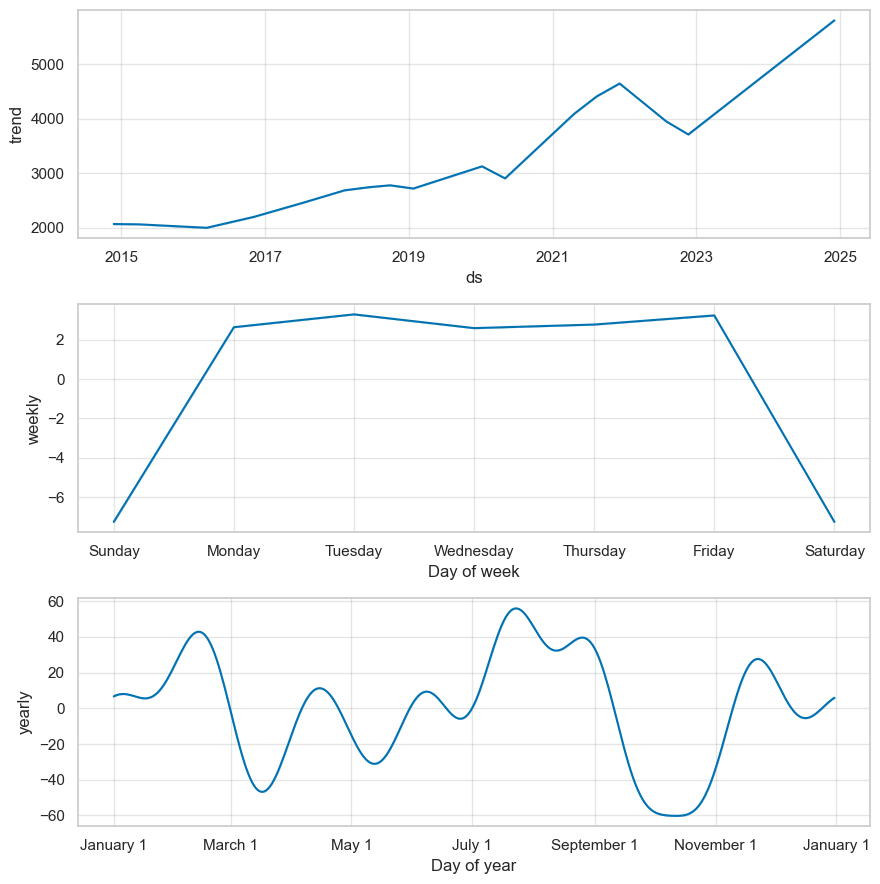

In [361]:
fig2 = m.plot_components(forecast)

m.plot_components(forecast) breaks down the forecast into individual components, such as trends, seasonality, and holidays.

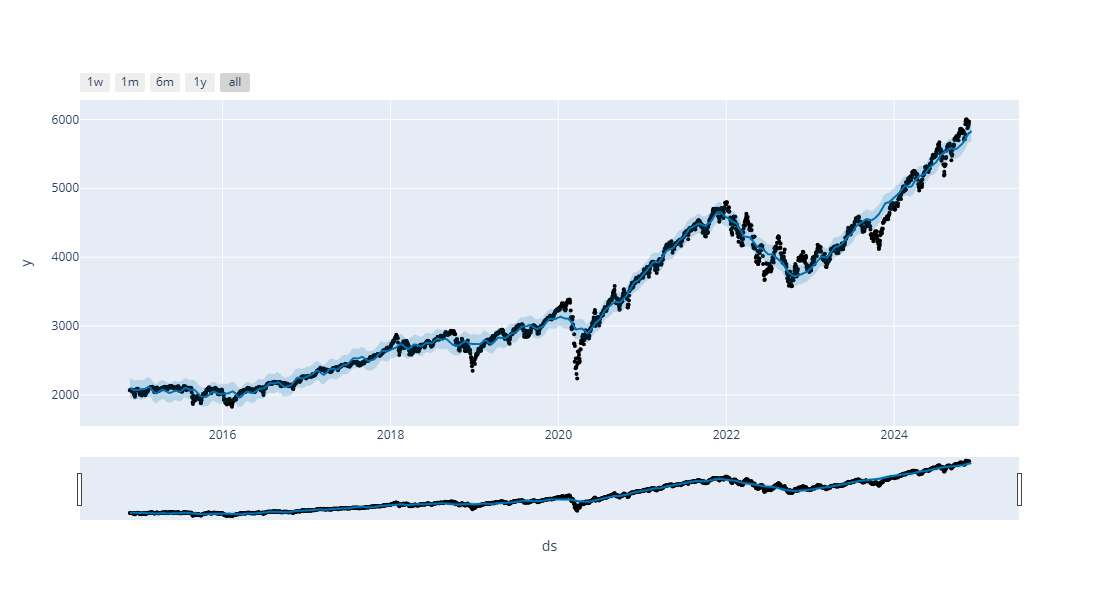

In [363]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

plot_plotly(m, forecast) generates an interactive plot of the forecast, similar to m.plot(), but with additional interactivity.
It visualizes the original time series, predictions (yhat), and uncertainty intervals (yhat_lower, yhat_upper) in an interactive format.

# Conclusions

* Market Trends: The S&P 500 dataset reveals consistent growth over time, reflecting the broader upward trend of the U.S. stock market, with notable periods of volatility during economic downturns, such as the 2008 financial crisis and the 2020 COVID-19 pandemic.

* Performance Drivers: The data shows that sectors like technology, healthcare, and consumer discretionary have been key drivers of performance, particularly in recent years, while traditional sectors like energy and materials have seen more mixed results.

* Volatility and Risk: The S&P 500 dataset highlights periods of high volatility, showing the risks involved in equity investments. However, long-term trends indicate that, despite fluctuations, the index tends to recover and grow, making it a key benchmark for investors.